# ECE558 Project
By Tuo and Yucan

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Other utilities
import time
from IPython.utils import io

with io.capture_output() as captured:
    import meep as mp
    from meep import mpb

from simulation import *

## Geometry variants

### Strip with PC and SiO2

epsilon: 2.08514-12.0647, mean 2.27904, harm. mean 2.24866, 100% > 1, 1.943% "fill"


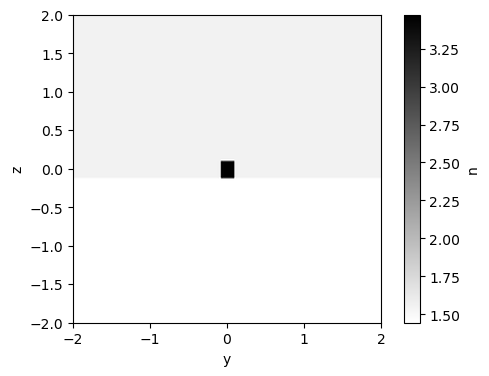

0.175 [1.5558129292617873, 1.5443537489390764, 1.5116706909814264, 1.506049655678884]
epsilon: 2.08514-12.0647, mean 2.35513, harm. mean 2.31306, 100% > 1, 2.70544% "fill"


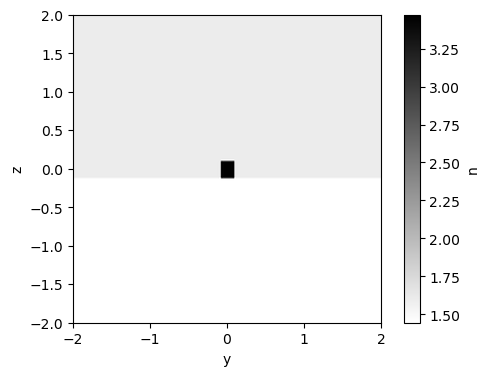

0.175 [1.5946452767591792, 1.5867898695633451, 1.5534314612741187, 1.5490247561471113]


In [30]:
sc_y = 4
sc_z = 4
sim = Simulation(sc_y=sc_y, sc_z=sc_z)

h = 0.220
w = 0.175 # waveguide width (um) # 175 nm as in Bilodeau paper 
geometry = [mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(), 
                        material=Simulation.Si),
            mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),center=mp.Vector3(0,0,0.25*sc_z+0.25*h), 
                     material=Simulation.SiO2)]

sim.init_mode_solver(geometry, default_material=Simulation.PC1)
sim.plot()
neff = sim.run()
print(w, neff)

sim.init_mode_solver(geometry, default_material=Simulation.PC2)
sim.plot()
neff = sim.run()
print(w, neff)

### Strip with Multiple Waveguide Blocks (PC above)

epsilon: 2.08514-12.0647, mean 2.3005, harm. mean 2.25079, 100% > 1, 2.15801% "fill"


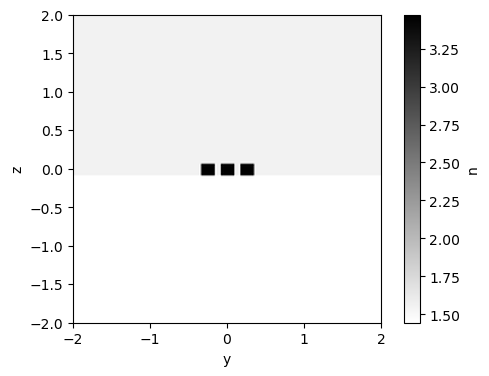

0.175 [1.668635642551132, 1.5556045324759387, 1.5234810475263802, 1.5097032587736063]
epsilon: 2.08514-12.0647, mean 2.37495, harm. mean 2.31383, 100% > 1, 2.90407% "fill"


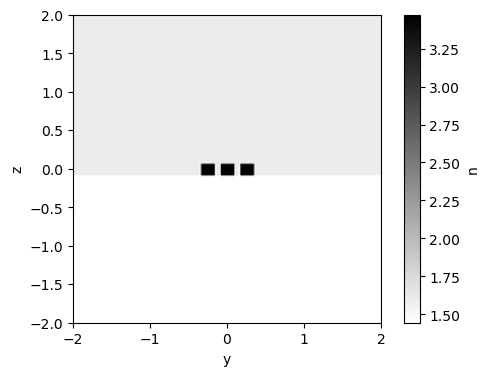

0.175 [1.7051847973036496, 1.59477723047211, 1.5675743010328835, 1.5515561009710477]


In [29]:
sc_y = 4
sc_z = 4
sim = Simulation(sc_y=sc_y, sc_z=sc_z)

blocks = 3
ws = 0.08
h = 0.150  # Si height (um) # 150 nm as in Bilodeau paper
w = 0.175 # waveguide width (um) # 175 nm as in Bilodeau paper 
geometry = [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), 
                        center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w / 2, 0), 
                        material=Simulation.Si) for x in range(blocks)],
            mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),center=mp.Vector3(0,0,0.25*sc_z+0.25*h), 
                     material=Simulation.SiO2)]

sim.init_mode_solver(geometry, default_material=Simulation.PC1)
sim.plot()
neff = sim.run()
print(w, neff)

sim.init_mode_solver(geometry, default_material=Simulation.PC2)
sim.plot()
neff = sim.run()
print(w, neff)

### Strip with Multiple Waveguide Blocks (PC in between blocks)

epsilon: 2.08514-12.0647, mean 2.13472, harm. mean 2.0952, 100% > 1, 0.496875% "fill"


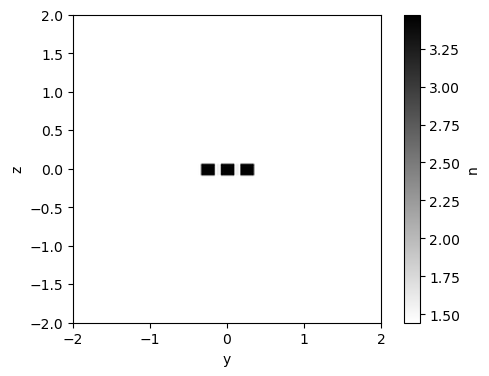

0.175 [1.621850441643989, 1.4794929372533585, 1.4366096291027748, 1.4268228519011437]
epsilon: 2.08514-12.0647, mean 2.13495, harm. mean 2.09535, 100% > 1, 0.499129% "fill"


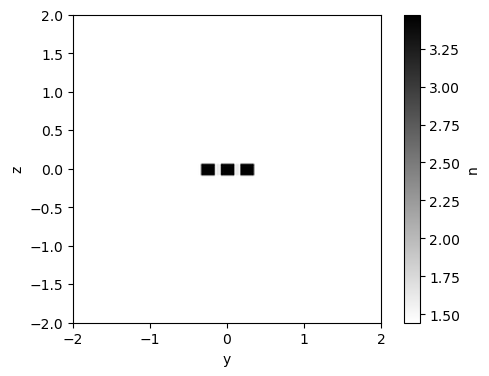

0.175 [1.6384245832453215, 1.4799893680308696, 1.4368797290038102, 1.4269421809042748]


In [35]:
sc_y = 4
sc_z = 4
sim = Simulation(sc_y=sc_y, sc_z=sc_z)

blocks = 3
ws = 0.08
h = 0.150  # Si height (um) # 150 nm as in Bilodeau paper
w = 0.175 # waveguide width (um) # 175 nm as in Bilodeau paper 
geometry = [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w / 2, 0), 
                        material=Simulation.Si) for x in range(blocks)],
             mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),center=mp.Vector3(0,0,0.25*sc_z+0.25*h), material=Simulation.SiO2),
             mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),center=mp.Vector3(0,0,-0.25*sc_z-0.25*h), material=Simulation.SiO2),
             mp.Block(size=mp.Vector3(mp.inf, 0.5*sc_y-0.5*(blocks*w+blocks*ws-ws), mp.inf),center=mp.Vector3(0,-0.25*sc_y-0.25*(blocks*w+blocks*ws-ws),0), material=Simulation.SiO2),
             mp.Block(size=mp.Vector3(mp.inf, 0.5*sc_y-0.5*(blocks*w+blocks*ws-ws), mp.inf),center=mp.Vector3(0,0.25*sc_y+0.25*(blocks*w+blocks*ws-ws),0), material=Simulation.SiO2)]

sim.init_mode_solver(geometry, default_material=Simulation.PC1)
sim.plot()
neff = sim.run()
print(w, neff)

sim.init_mode_solver(geometry, default_material=Simulation.PC2)
sim.plot()
neff = sim.run()
print(w, neff)

## Sweep all parameters for each variant

### Set up all the possible settings

In [77]:
## For each setting
# [ name: str,  blocks: int, w_range: [range of w], ws_range: [range of ws], geometry: lambda (w, ws, blocks): [mp.GeometricObject]]
sc_y = 4
sc_z = 4
h = 0.220  # Si height (um) # 150 nm as in Bilodeau paper
singleblock_geometry = lambda w, _, __: [mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(),  material=Simulation.Si), 
                            mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),center=mp.Vector3(0,0,0.25*sc_z+0.25*h), material=Simulation.SiO2)]

multiblock_geometry = lambda w, ws, blocks: [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), 
                                                         center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w / 2, 0), 
                                                         material=Simulation.Si) for x in range(blocks)],
                                             mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),
                                                      center=mp.Vector3(0,0,0.25*sc_z+0.25*h), material=Simulation.SiO2)]
multiblock_m_geometry = lambda w, ws, blocks: [ *[mp.Block(size=mp.Vector3(mp.inf, w, h), center=mp.Vector3(0, 0 - (blocks * w + (blocks - 1) * ws) / 2 + x * (w + ws) + w / 2, 0), 
                                                           material=Simulation.Si) for x in range(blocks)],
                                               mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),center=mp.Vector3(0,0,0.25*sc_z+0.25*h), material=Simulation.SiO2),
                                               mp.Block(size=mp.Vector3(mp.inf, mp.inf, 0.5*sc_z-0.5*h),center=mp.Vector3(0,0,-0.25*sc_z-0.25*h), material=Simulation.SiO2),
                                               mp.Block(size=mp.Vector3(mp.inf, 0.5*sc_y-0.5*(blocks*w+blocks*ws-ws), mp.inf),center=mp.Vector3(0,-0.25*sc_y-0.25*(blocks*w+blocks*ws-ws),0), material=Simulation.SiO2),
                                               mp.Block(size=mp.Vector3(mp.inf, 0.5*sc_y-0.5*(blocks*w+blocks*ws-ws), mp.inf),center=mp.Vector3(0,0.25*sc_y+0.25*(blocks*w+blocks*ws-ws),0), material=Simulation.SiO2)]

settings = [
    ("S1", 1, np.linspace(0.06, 1.6, 78), [0], singleblock_geometry),
     
    ("S2", 2, np.linspace(0.06, 0.99, 32), np.linspace(0.06, 0.99, 32), multiblock_geometry),
    ("S2_m", 2, np.linspace(0.06, 0.99, 32), np.linspace(0.06, 0.99, 32), multiblock_m_geometry),
    
    ("S3", 3, np.linspace(0.06, 0.84, 27), np.linspace(0.06, 0.48, 15), multiblock_geometry),
    ("S3+m", 3, np.linspace(0.06, 0.84, 27), np.linspace(0.06, 0.48, 15), multiblock_m_geometry),
    
    ("S4", 4, np.linspace(0.06, 0.75, 24), np.linspace(0.06, 0.39, 12), multiblock_geometry),
    ("S4+m", 4, np.linspace(0.06, 0.75, 24), np.linspace(0.06, 0.39, 12), multiblock_m_geometry)
]

### Plot all settings 

epsilon: 2.08514-12.0647, mean 2.46827, harm. mean 2.28376, 100% > 1, 3.83921% "fill"


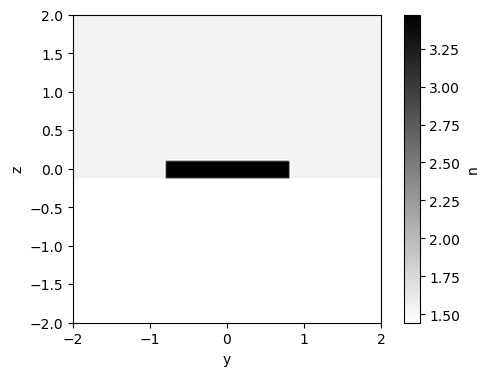

epsilon: 2.08514-12.0647, mean 2.51875, harm. mean 2.29349, 100% > 1, 4.34504% "fill"


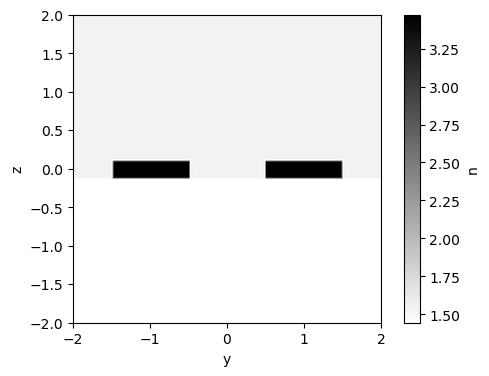

epsilon: 2.08514-12.0647, mean 2.36164, harm. mean 2.1402, 100% > 1, 2.77074% "fill"


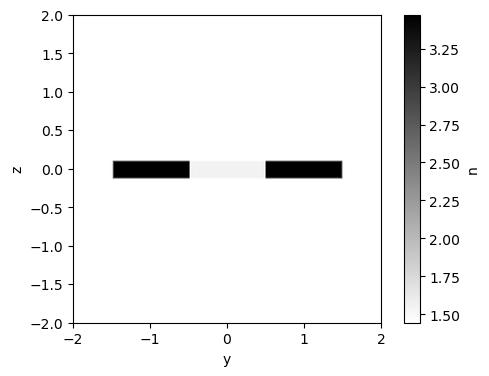

epsilon: 2.08514-12.0647, mean 2.59052, harm. mean 2.30728, 100% > 1, 5.0642% "fill"


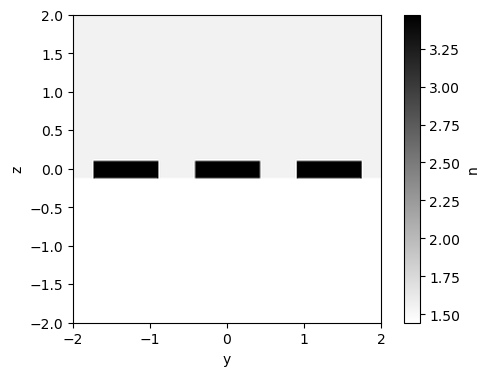

epsilon: 2.08514-12.0647, mean 2.43581, harm. mean 2.1544, 100% > 1, 3.51393% "fill"


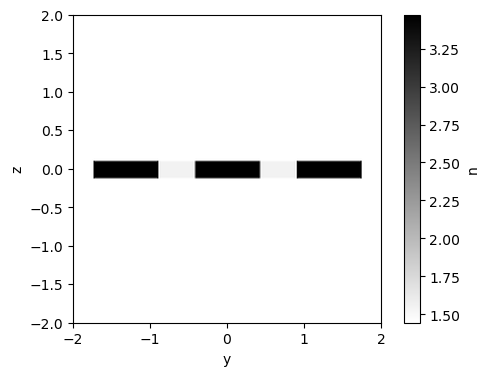

epsilon: 2.08514-12.0647, mean 2.63163, harm. mean 2.31498, 100% > 1, 5.4761% "fill"


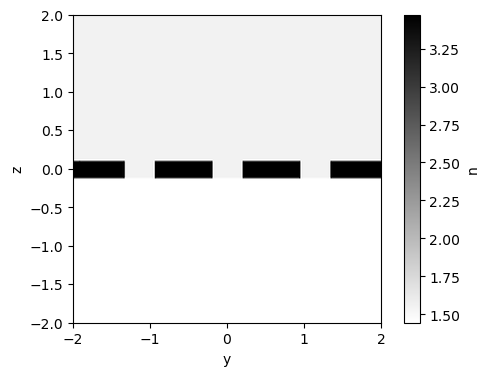

epsilon: 2.08514-12.0647, mean 2.47919, harm. mean 2.16333, 100% > 1, 3.94865% "fill"


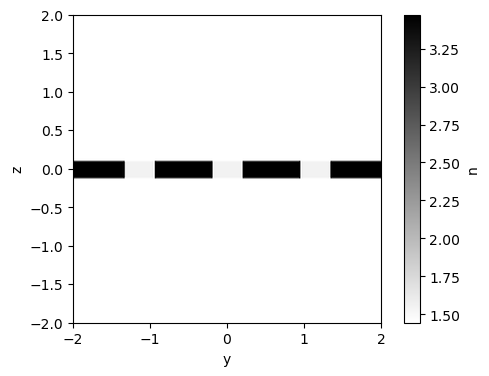

In [78]:
sim = Simulation(sc_y=sc_y, sc_z=sc_z)
for (setting, blocks, w_range, ws_range, geometry_lambda) in settings:
    neffs = np.array([len(w_range), len(ws_range), 2, 4])
    for w in w_range[-1:]:
        for ws in ws_range[-1:]:
            geometry = geometry_lambda(w, ws, blocks)
            sim.init_mode_solver(geometry, default_material=Simulation.PC1)
            sim.plot()
            break
        break


### Execute the settings

In [ ]:
import asyncio

def get_path(name):
    return f"./data/sim_{name}.npy"

def simulation_execute(setting, spinner=None):
    sim = Simulation(sc_y=sc_y, sc_z=sc_z)
    (setting_name, blocks, w_range, ws_range, geometry_lambda) = setting
    neffs = np.zeros([len(w_range), len(ws_range), 2, 4])
    total = len(w_range) * len(ws_range)
    curr = 0
    for w_i, w in enumerate(w_range):
        for ws_i, ws in enumerate(ws_range):
            curr += 1
            if spinner: 
                spinner.text = f"Progress {curr} / {total} iterations ..."
                spinner.frame()
            geometry = geometry_lambda(w, ws, blocks)
            sim.init_mode_solver(geometry, default_material=Simulation.PC1)
            neff = sim.run()
            neffs[w_i][ws_i][0] = neff
            
            sim.init_mode_solver(geometry, default_material=Simulation.PC2)
            neff = sim.run()
            neffs[w_i][ws_i][1] = neff
            break
        break
    
    path = get_path(setting_name)
    np.save(path, neffs)
    if spinner: 
        spinner.succeed(f"Finished simulation with setting {setting_name}, saved to {path}")

from halo import Halo
with Halo(text='Simulating', spinner='dots') as spinner:
    for i, setting in enumerate(settings[0:]):
        spinner.info(f"Simulating {i}. {setting[0]} ...")
        simulation_execute(setting, spinner)
                        

## Post-processing

### Load data points and draw diagrams

In [90]:
def plot_data_line(setting, setting_data, ws=0):
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20, 10), dpi=300)

    x = setting[2]
    ax1.plot(x, [1.552] * len(x), ':', label="PC1")
    ax2.plot(x, [1.598] * len(x), ':', label="PC2")
    for mode in range(setting_data.shape[3]):
        ax1.plot(x, setting_data[:, ws, 0, mode], '.-', label=f"mode_{mode}")
        ax2.plot(x, setting_data[:, ws, 1, mode], '.-', label=f"mode_{mode}")

    # Label the last point fit the condition
    max_mode_1 = 0
    max_mode_2 = 0
    for i in range(setting_data.shape[0]):
        if np.sum(setting_data[i, ws, 0, :] > 1.552) == 2:
            max_mode_1 = i
        if np.sum(setting_data[i, ws, 1, :] > 1.598) < 2:
            max_mode_2 = i
    print(x[max_mode_1], x[max_mode_2])
    ax1.axvline(x[max_mode_1])
    ax2.axvline(x[max_mode_2])
    ax1.legend()
    ax2.legend()
    ax1.set_title(f"{setting[0]} state 1 (ws={setting[3][ws]})")
    ax2.set_title(f"{setting[0]} state 2 (ws={setting[3][ws]})")

### 1. S1

0.56 0.1


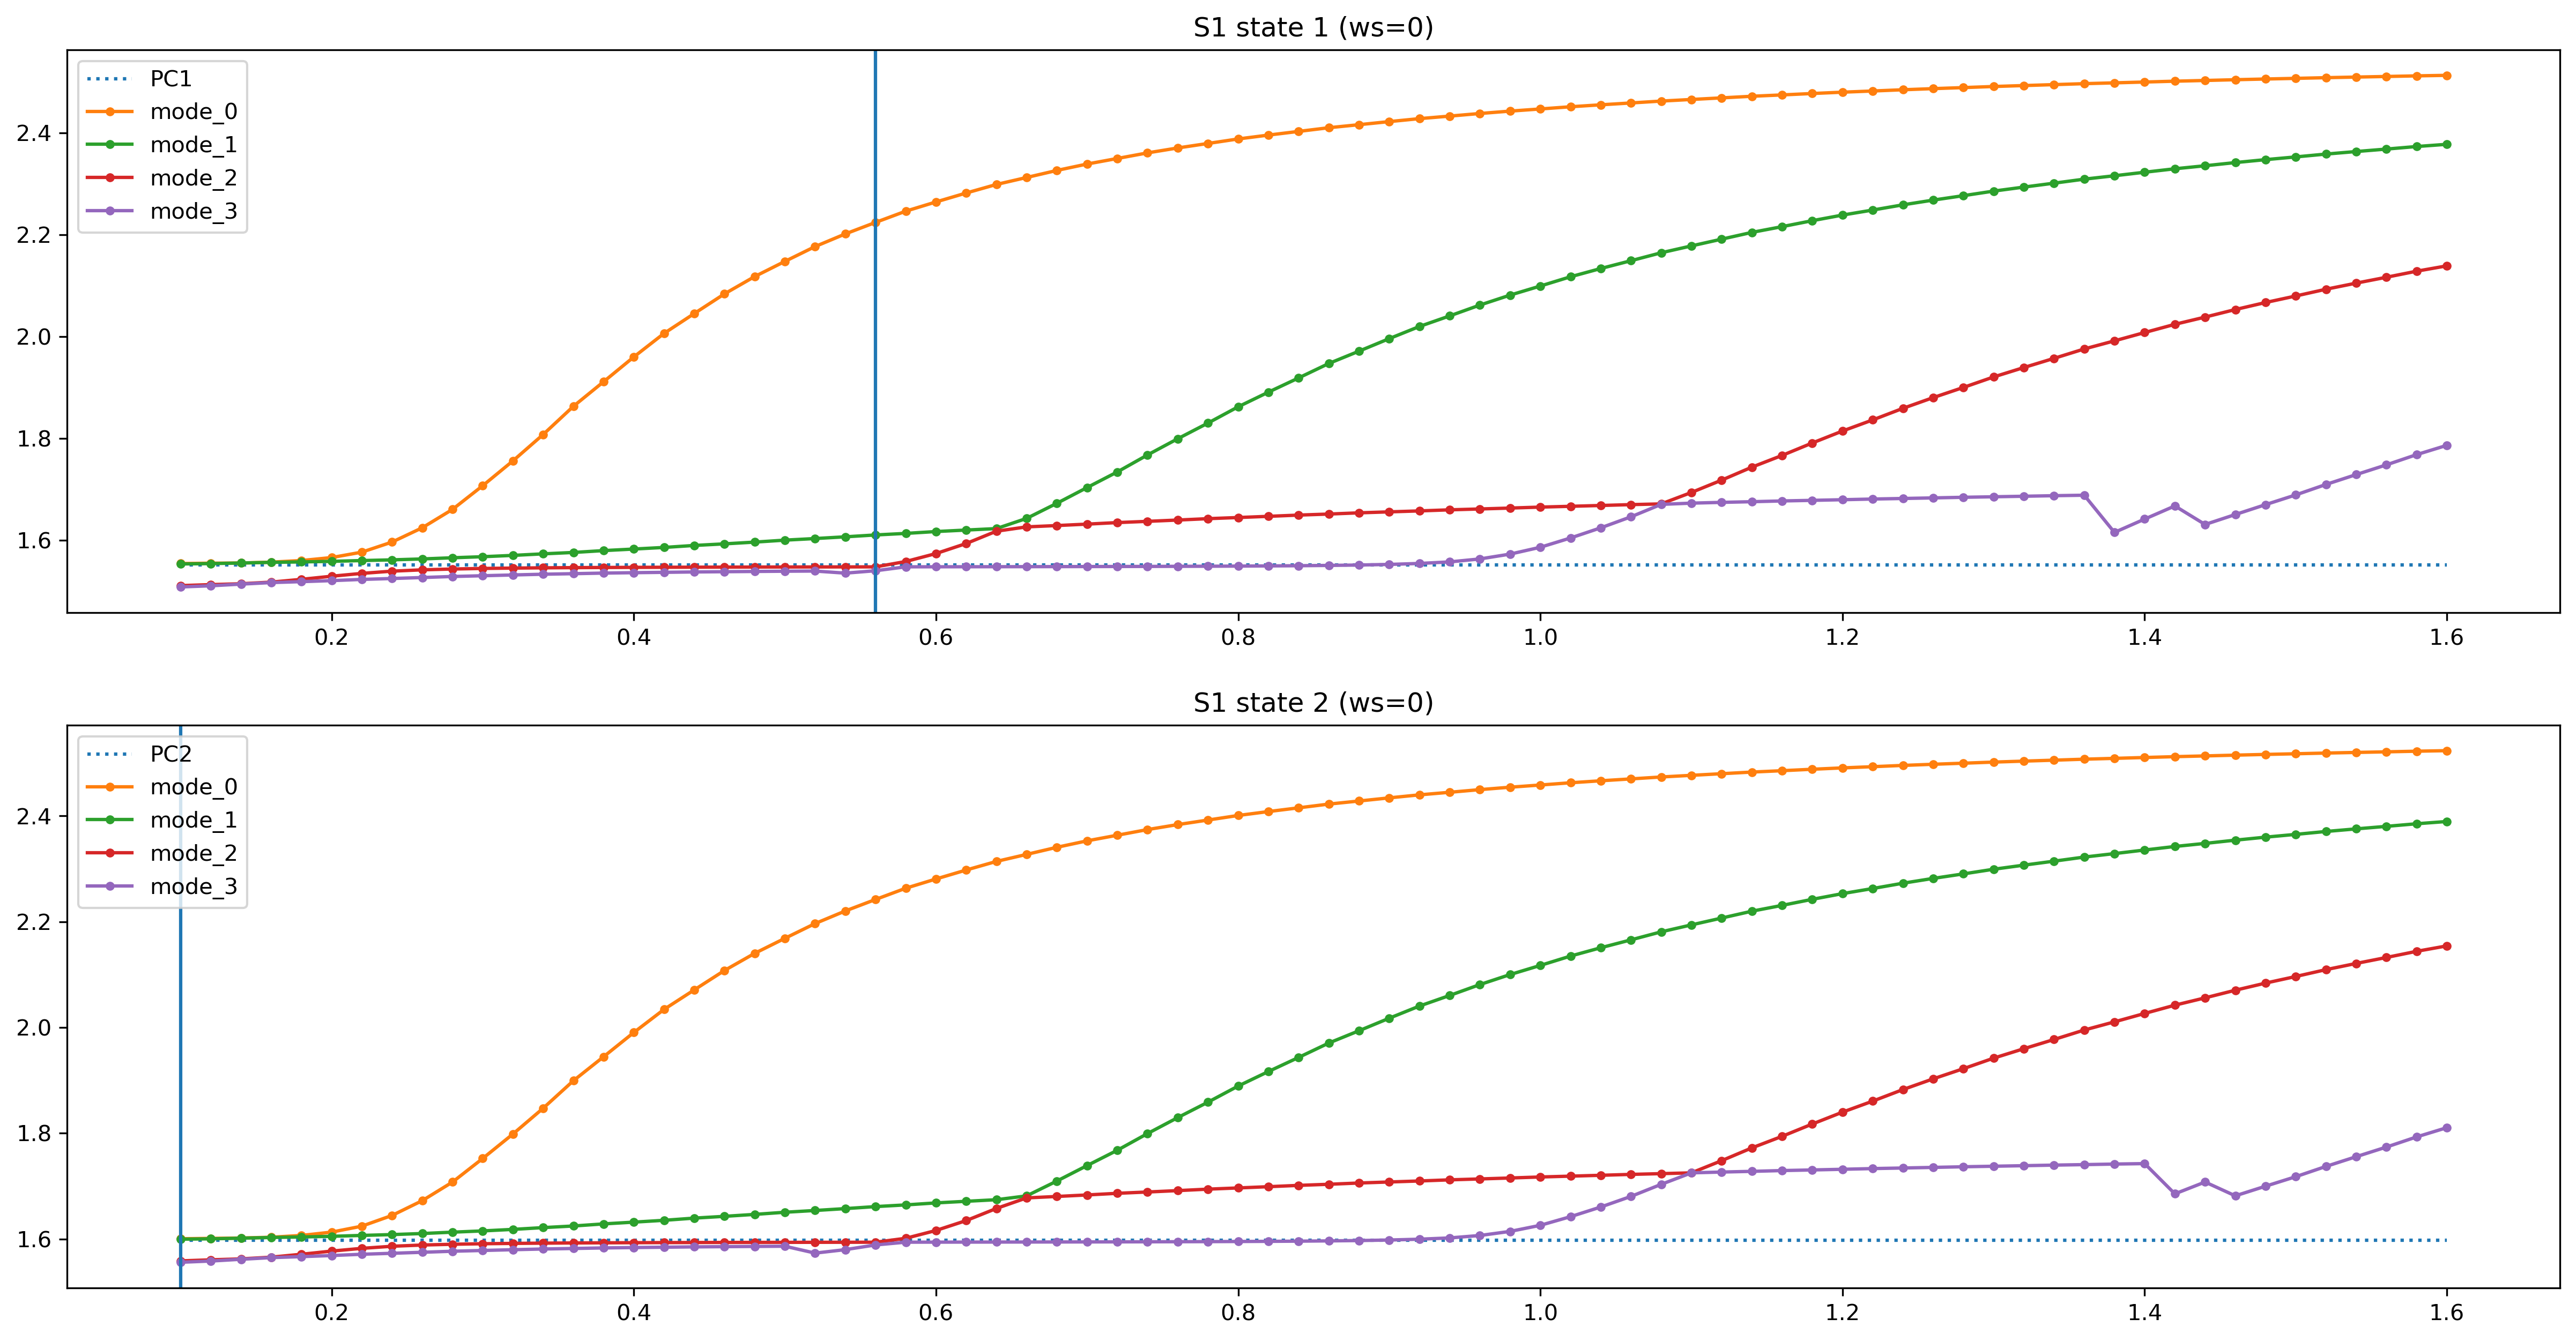

In [94]:
setting_S1 = np.load(get_path(settings[0][0]))
plot_data_line(settings[0], setting_S1)

### 2. S1 + SiO2

0.62 0.48


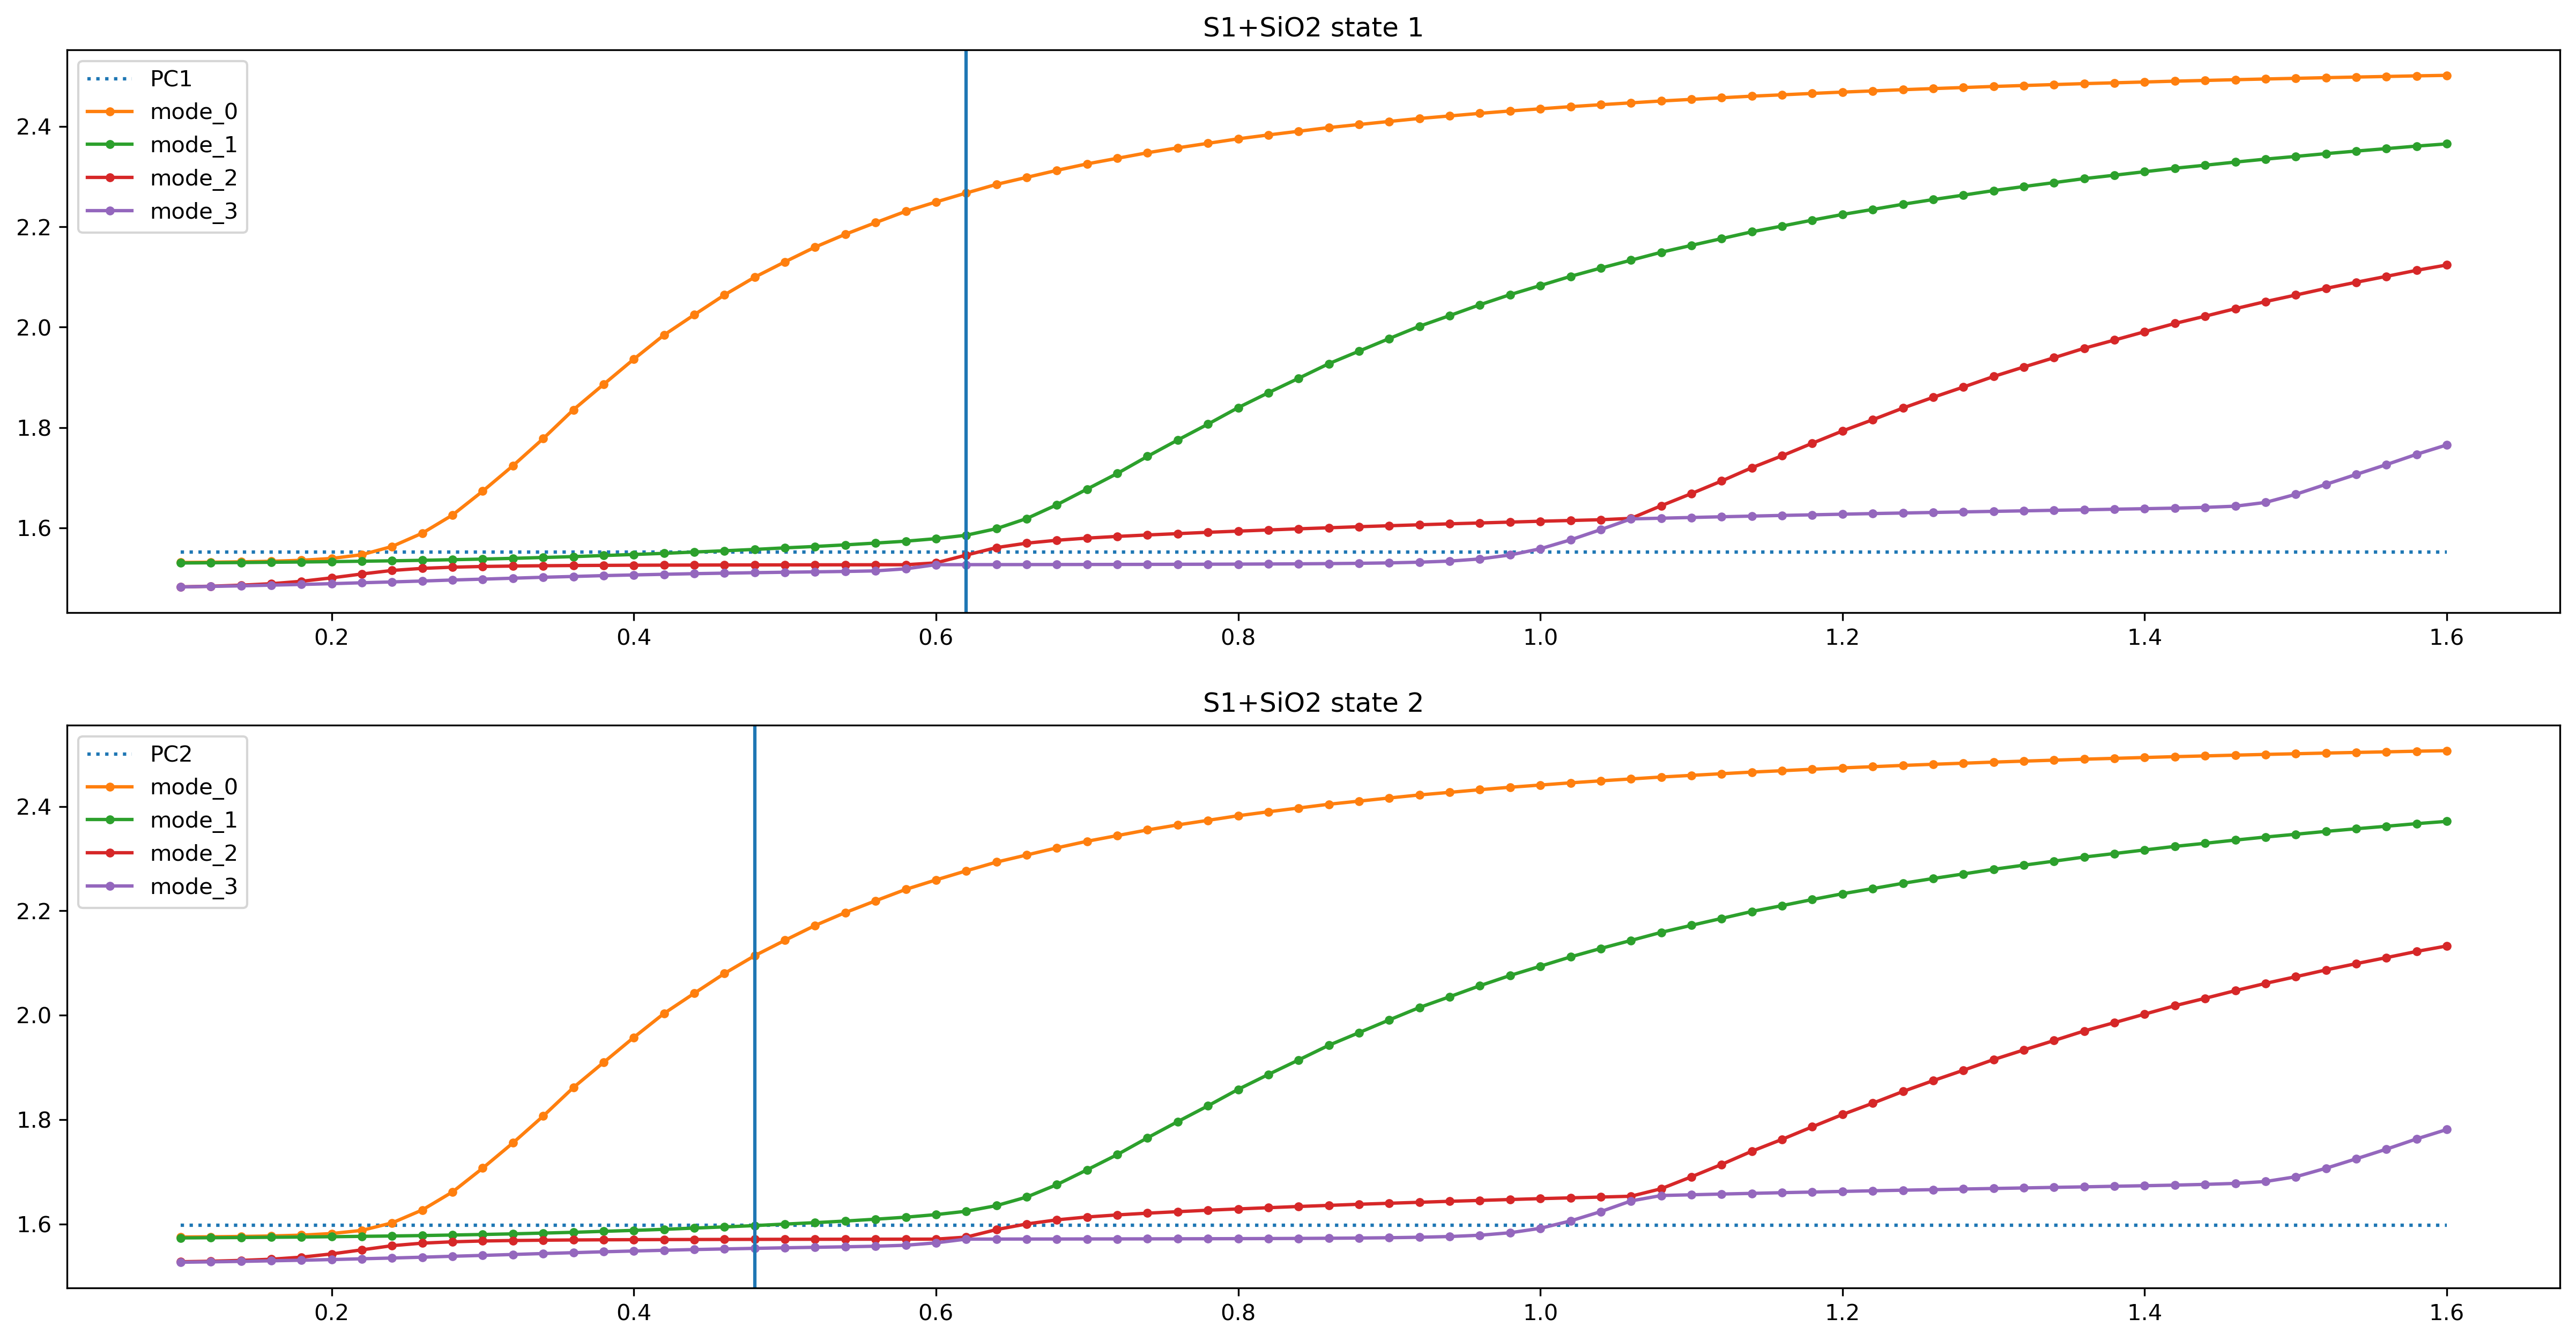

In [71]:
s = 1
setting_S2 = np.load(get_path(settings[s][0]))
plot_data_line(settings[s], setting_S1)

### 3. S2

In [78]:
setting_S2.shape

(28, 25, 2, 4)

0.28 0.1
0.25 0.1
0.22000000000000003 0.1


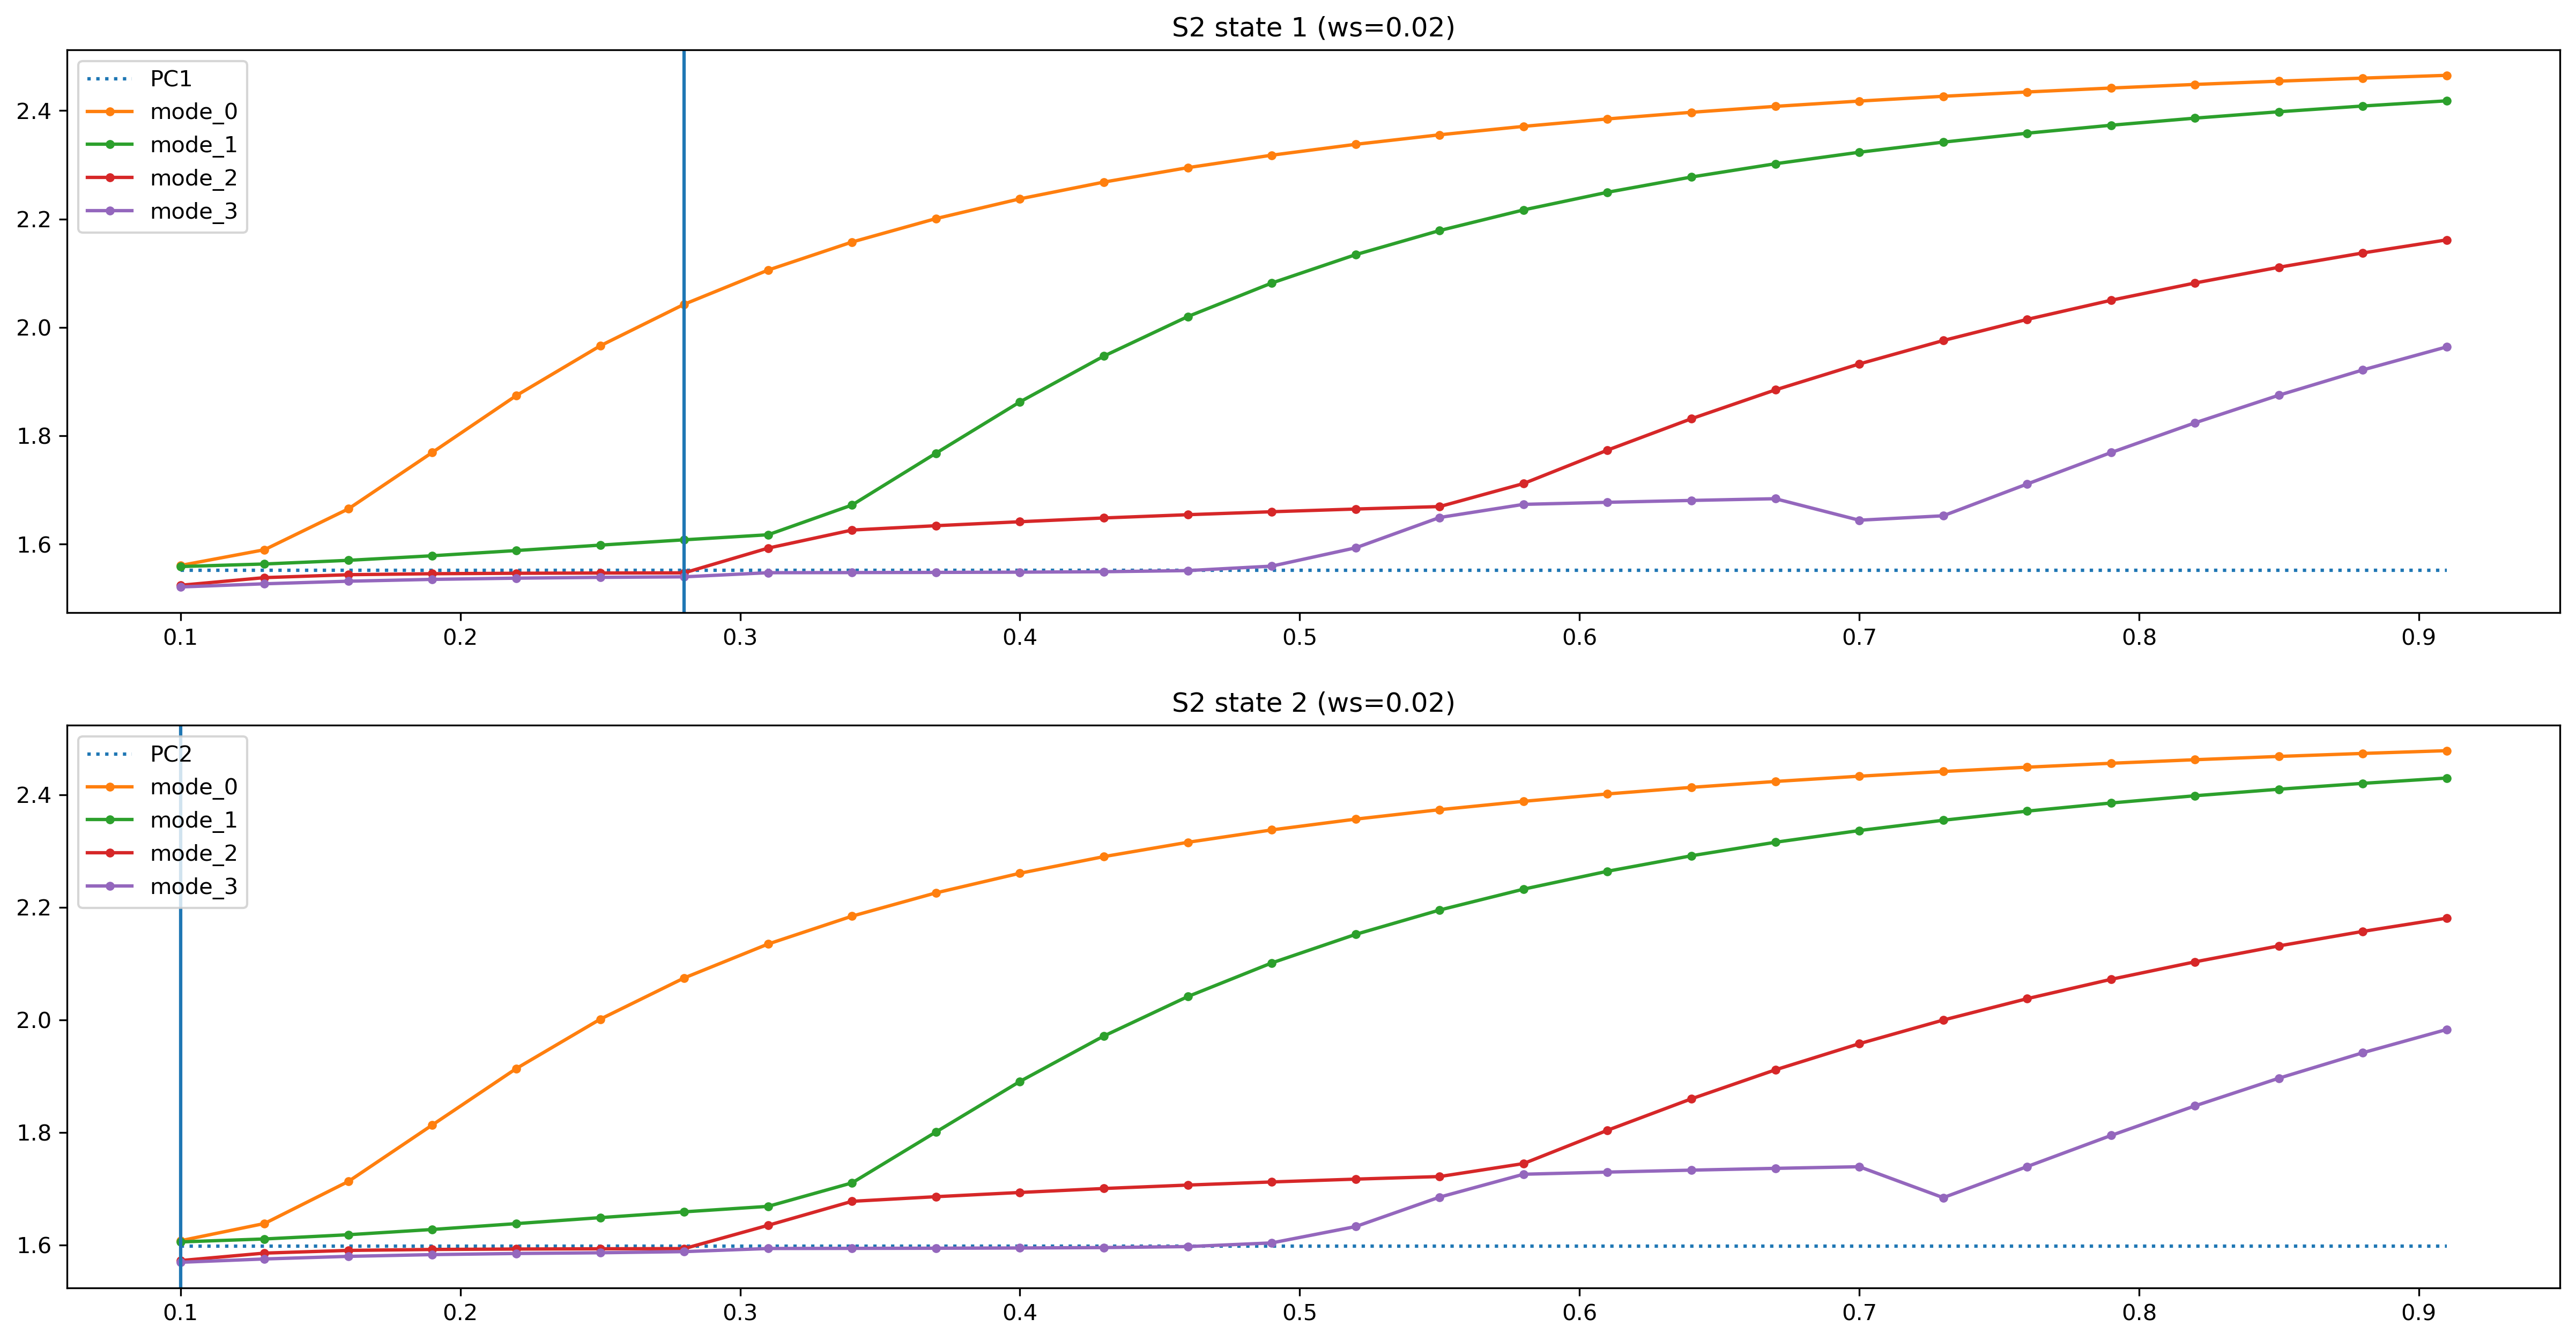

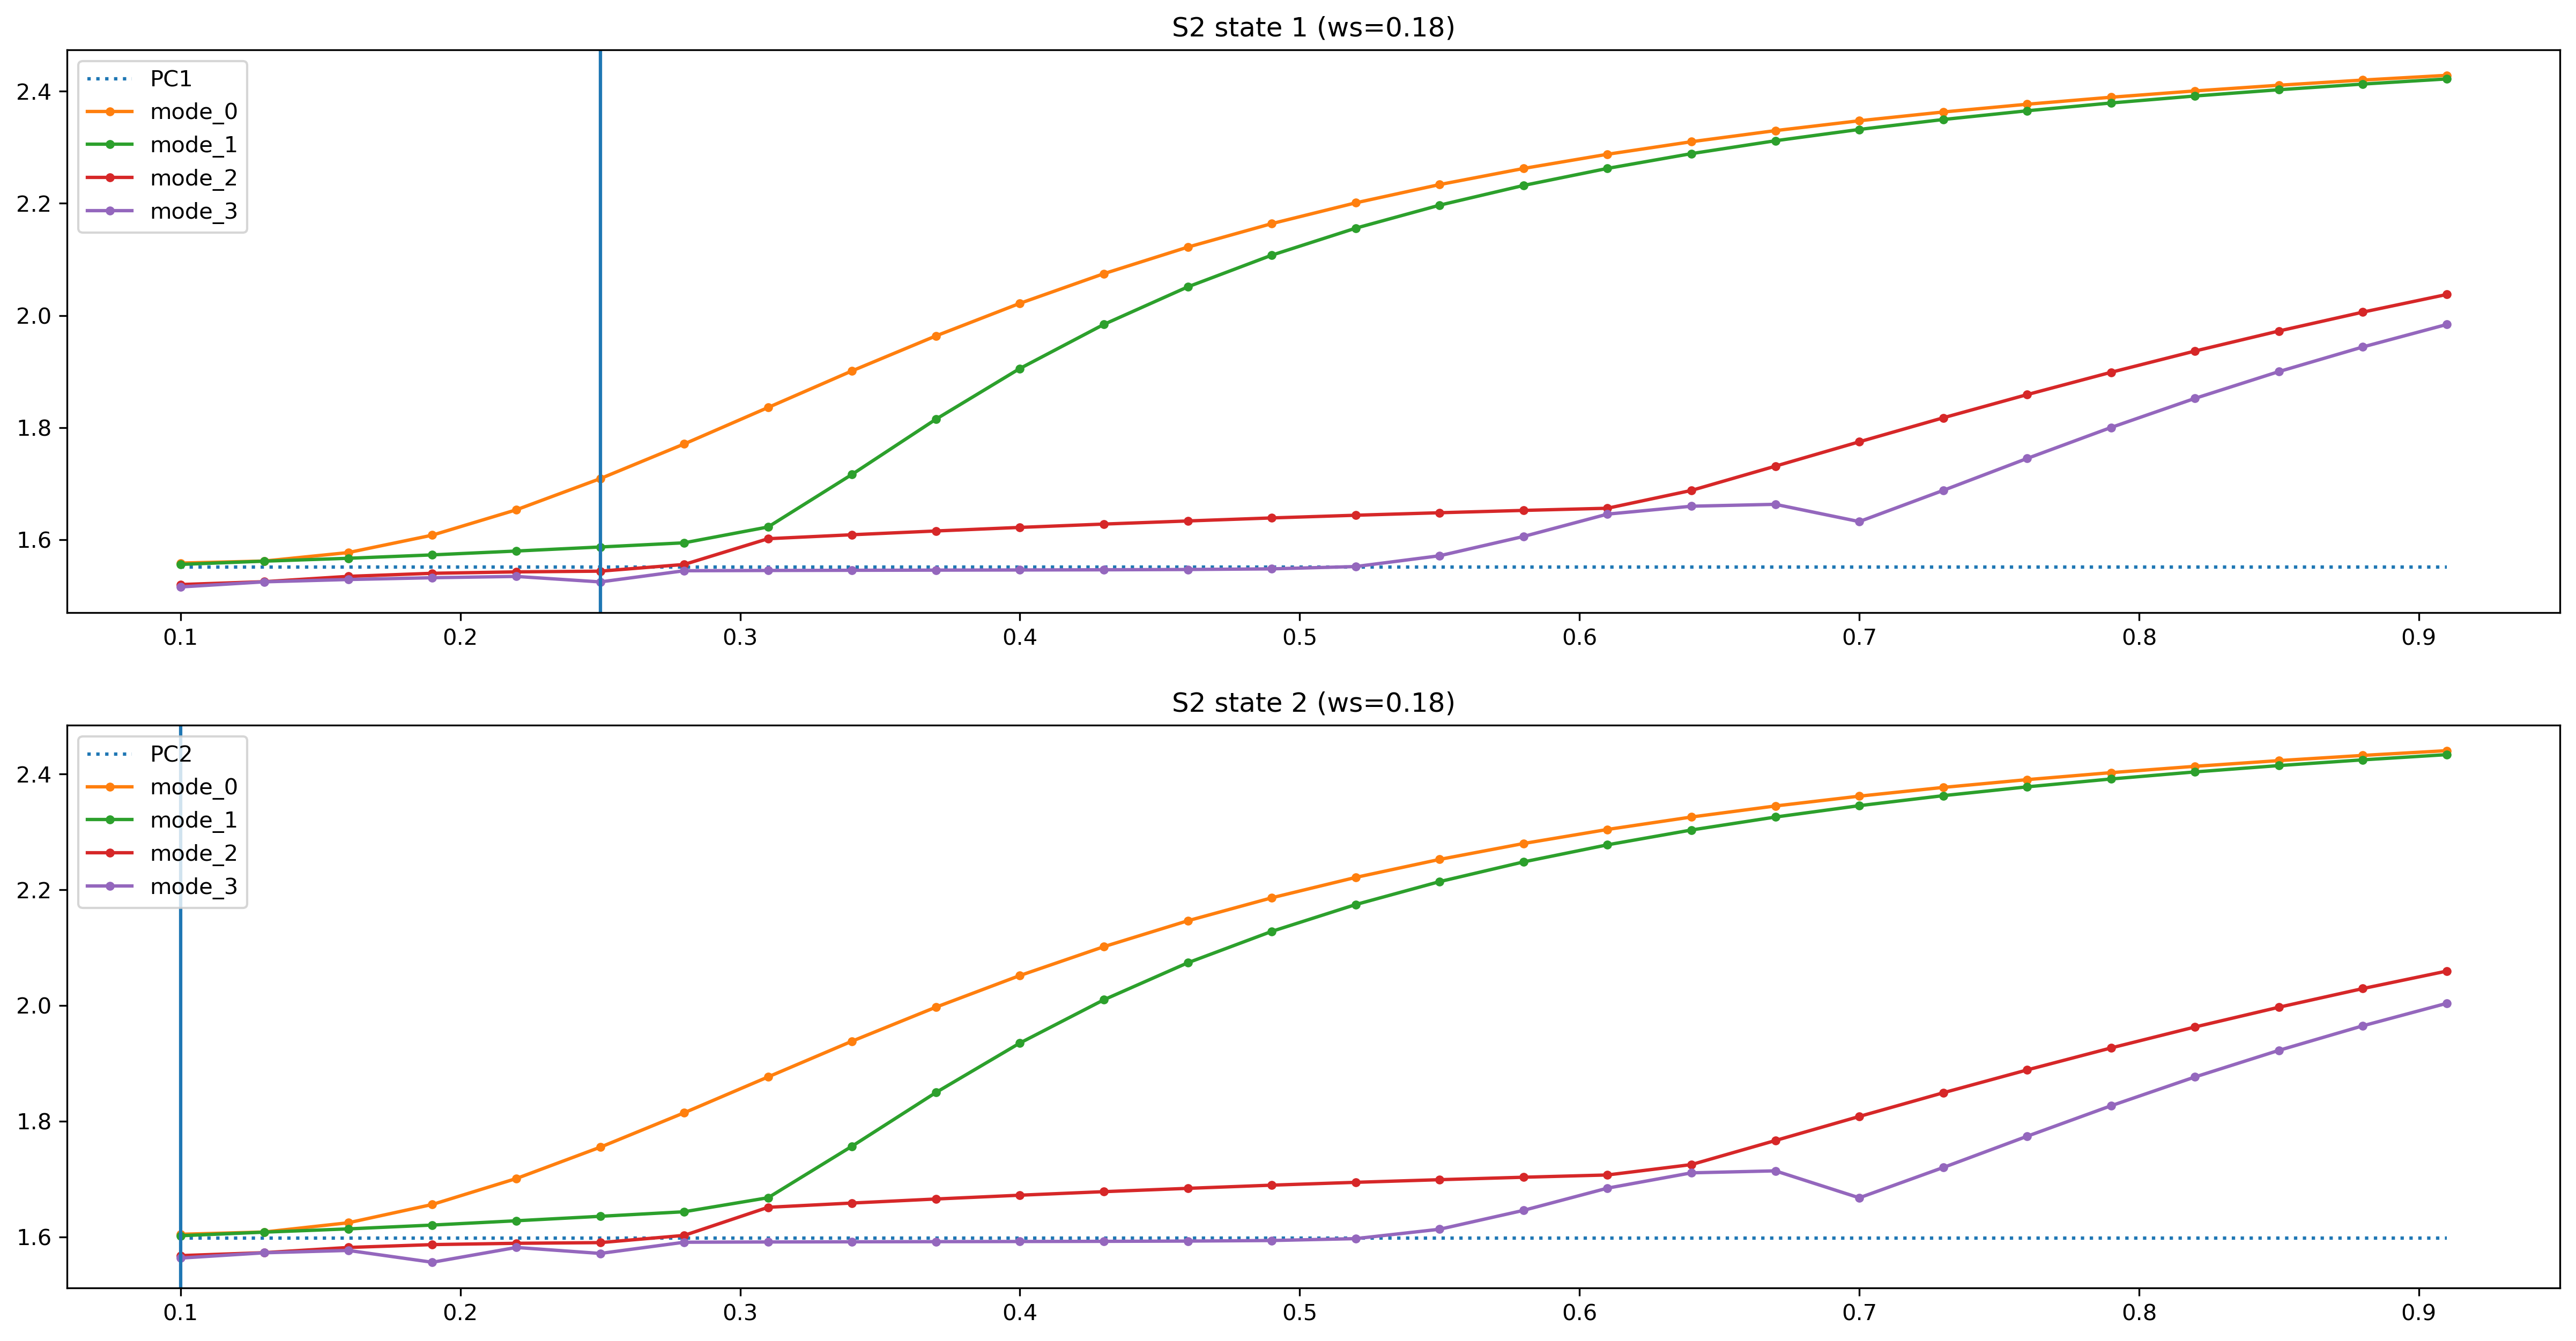

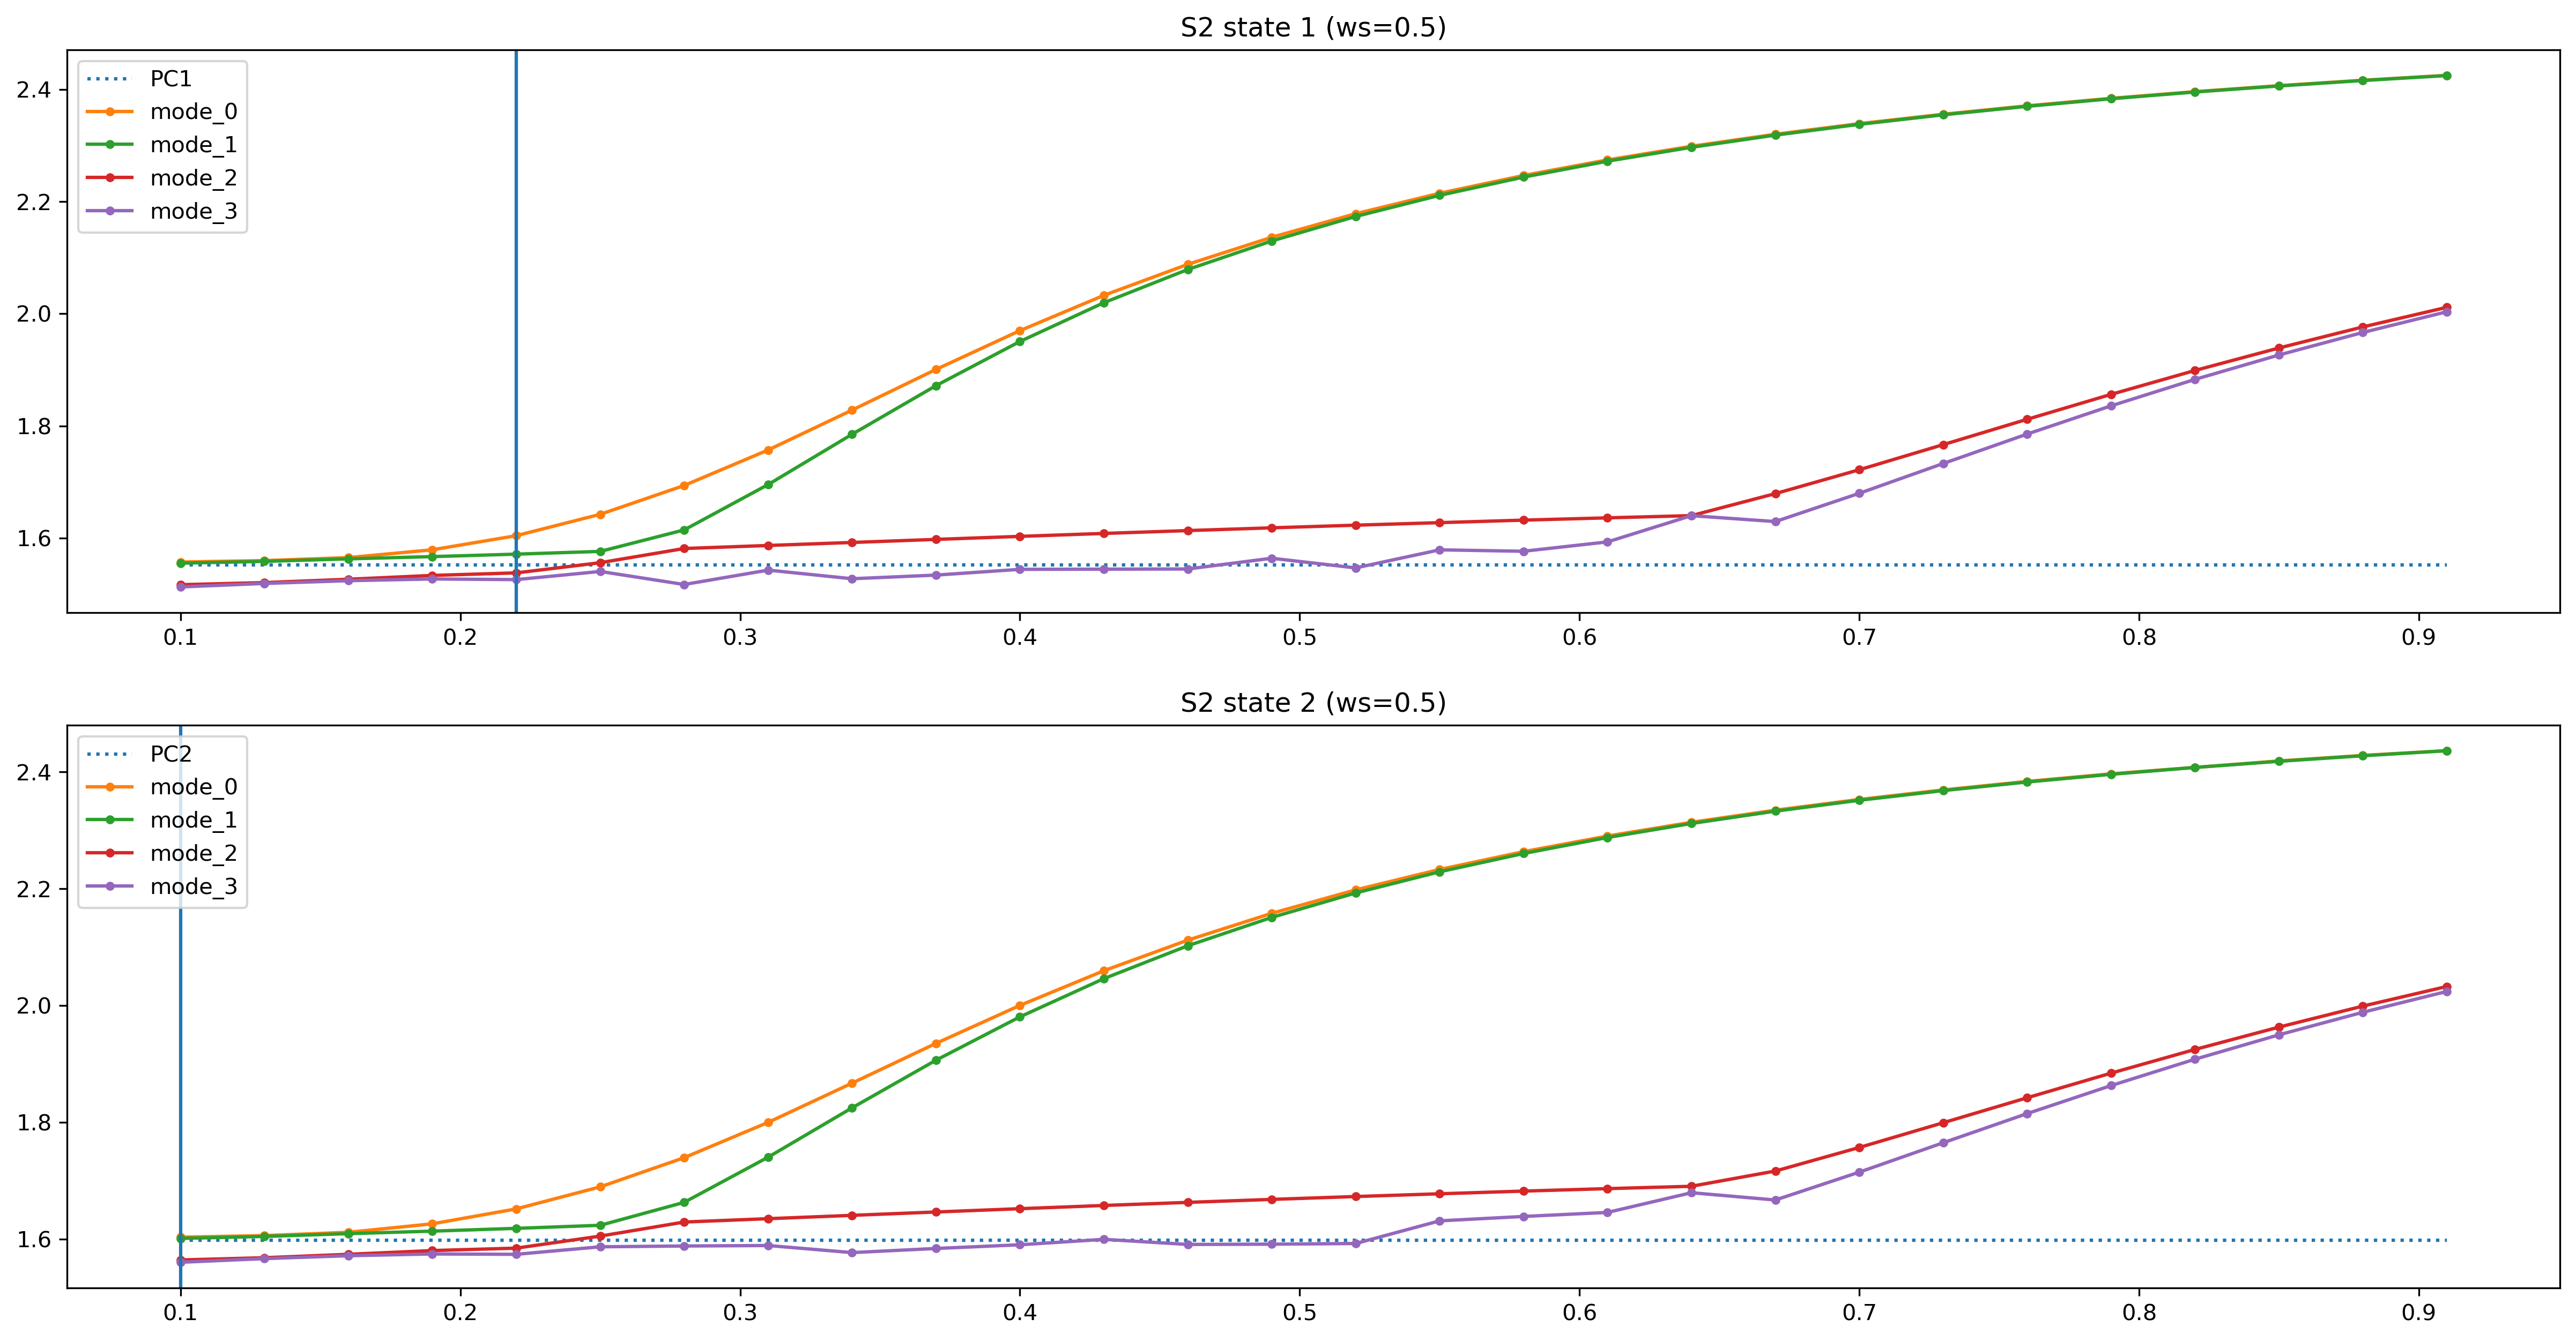

In [91]:
s = 2
setting = np.load(get_path(settings[s][0]))
plot_data_line(settings[s], setting)
plot_data_line(settings[s], setting, ws = 4)
plot_data_line(settings[s], setting, ws = setting.shape[1] // 2)

### 6. S3

0.19 0.1
0.19 0.1
0.19 0.1


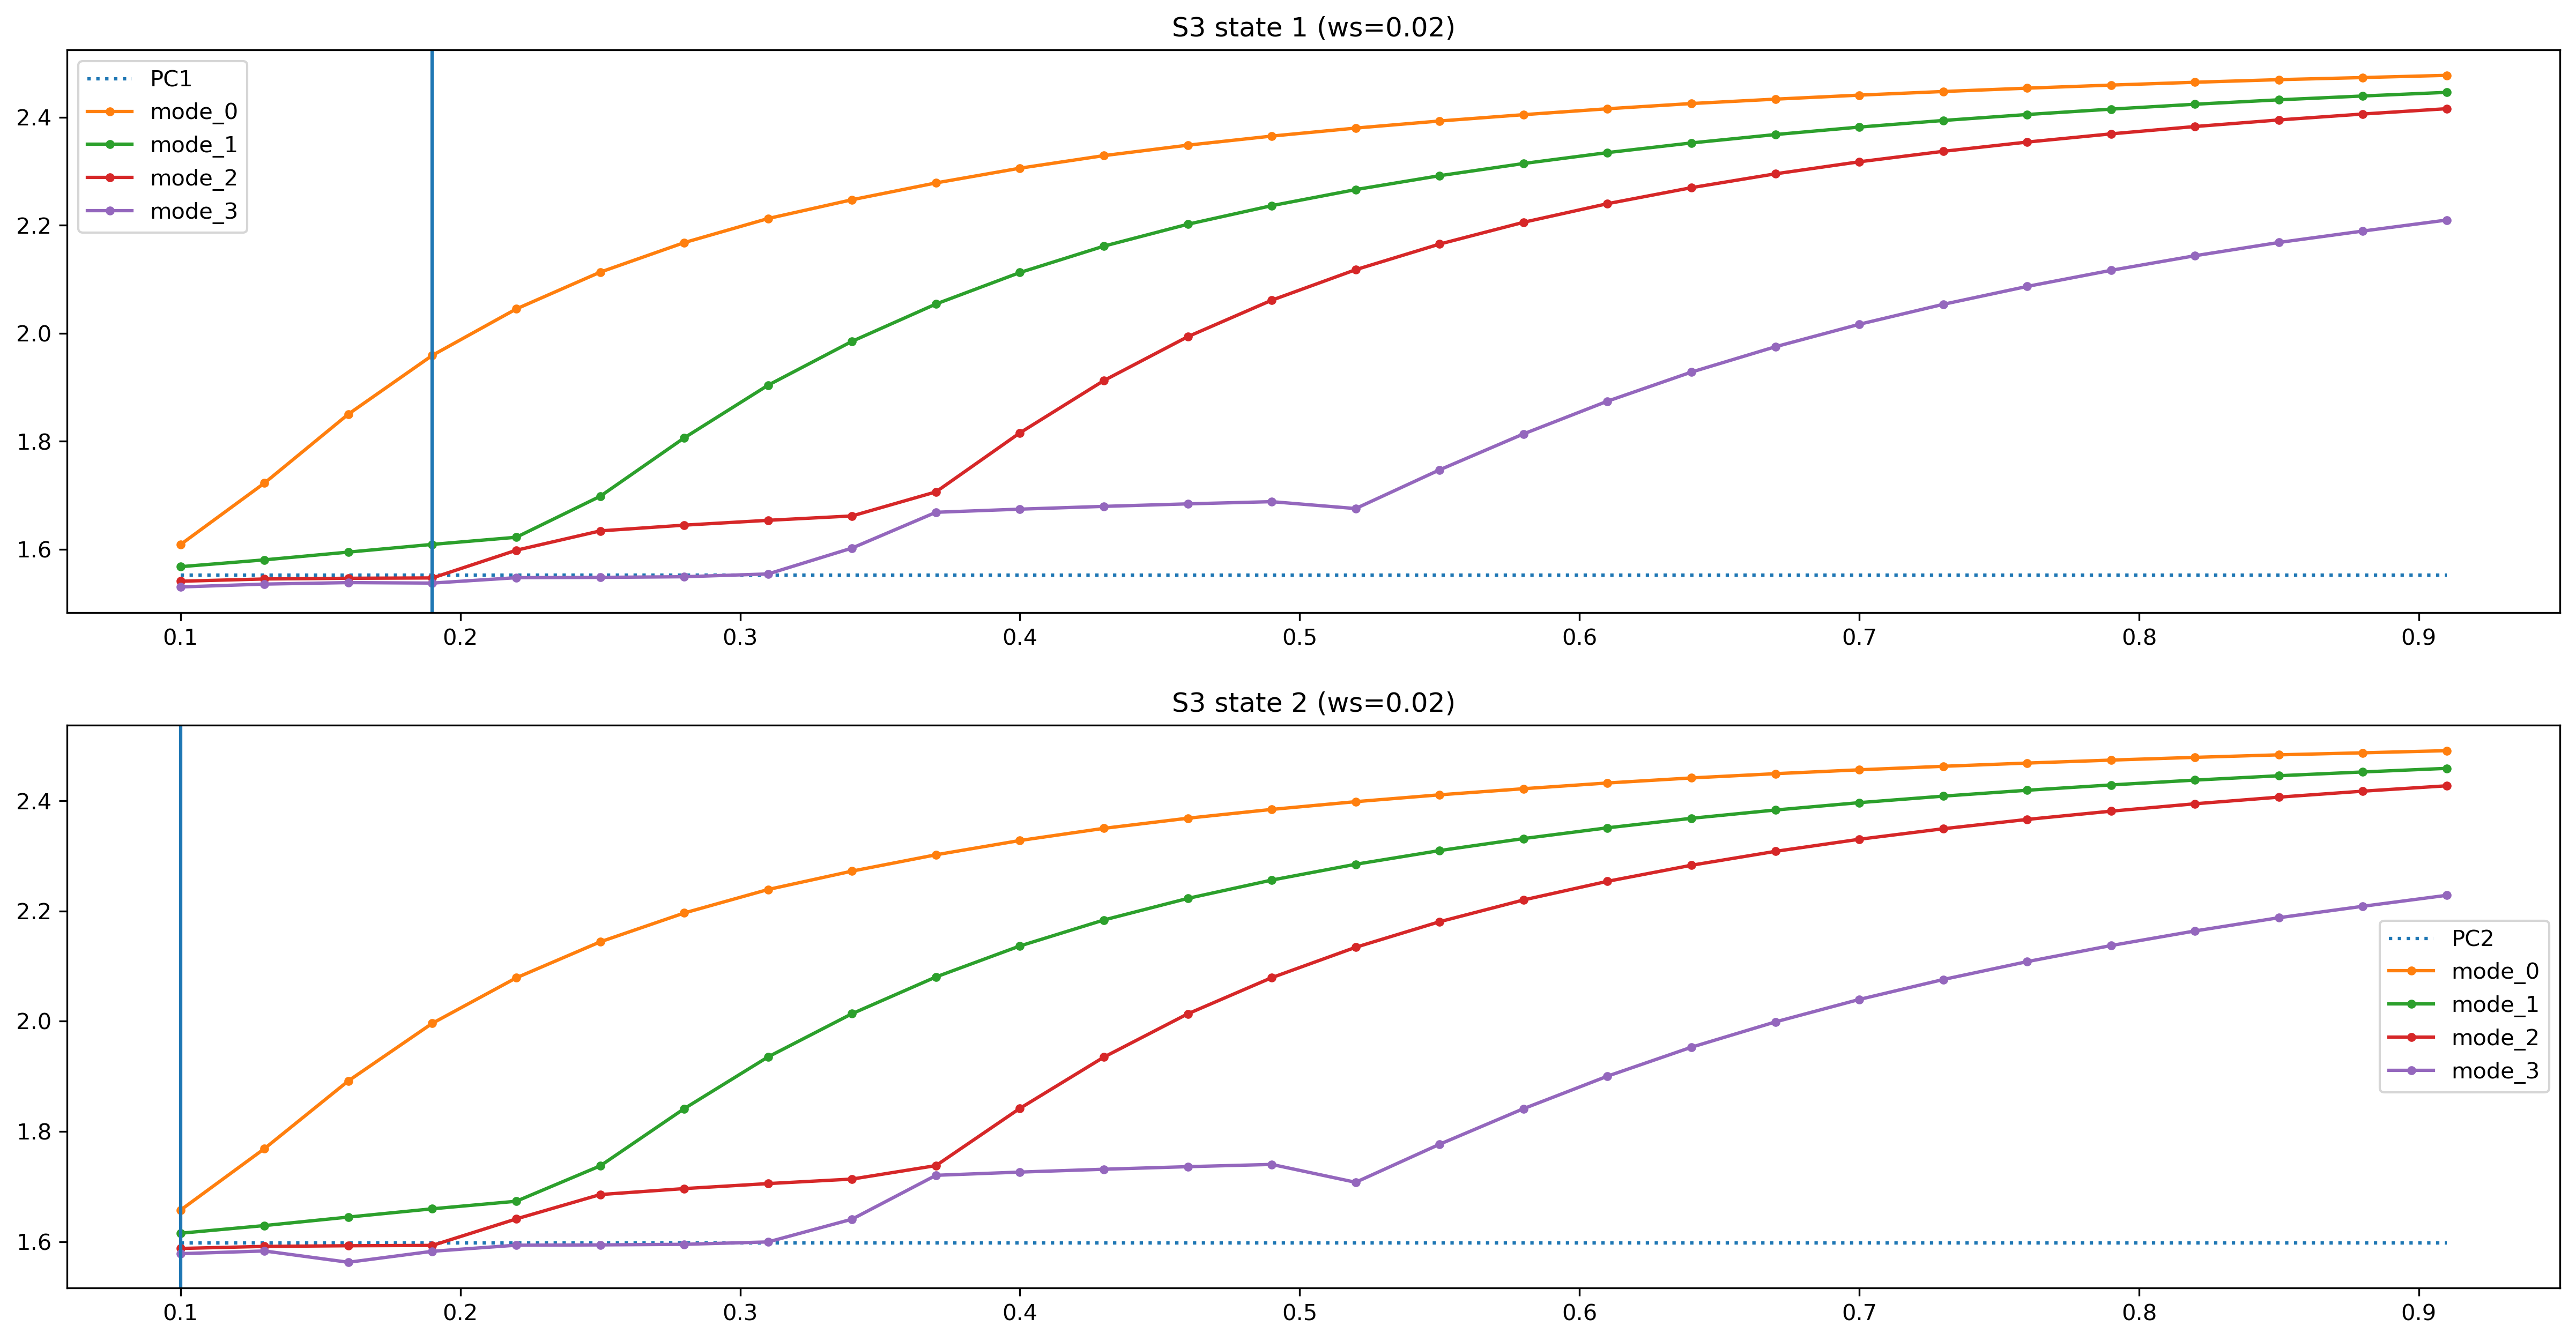

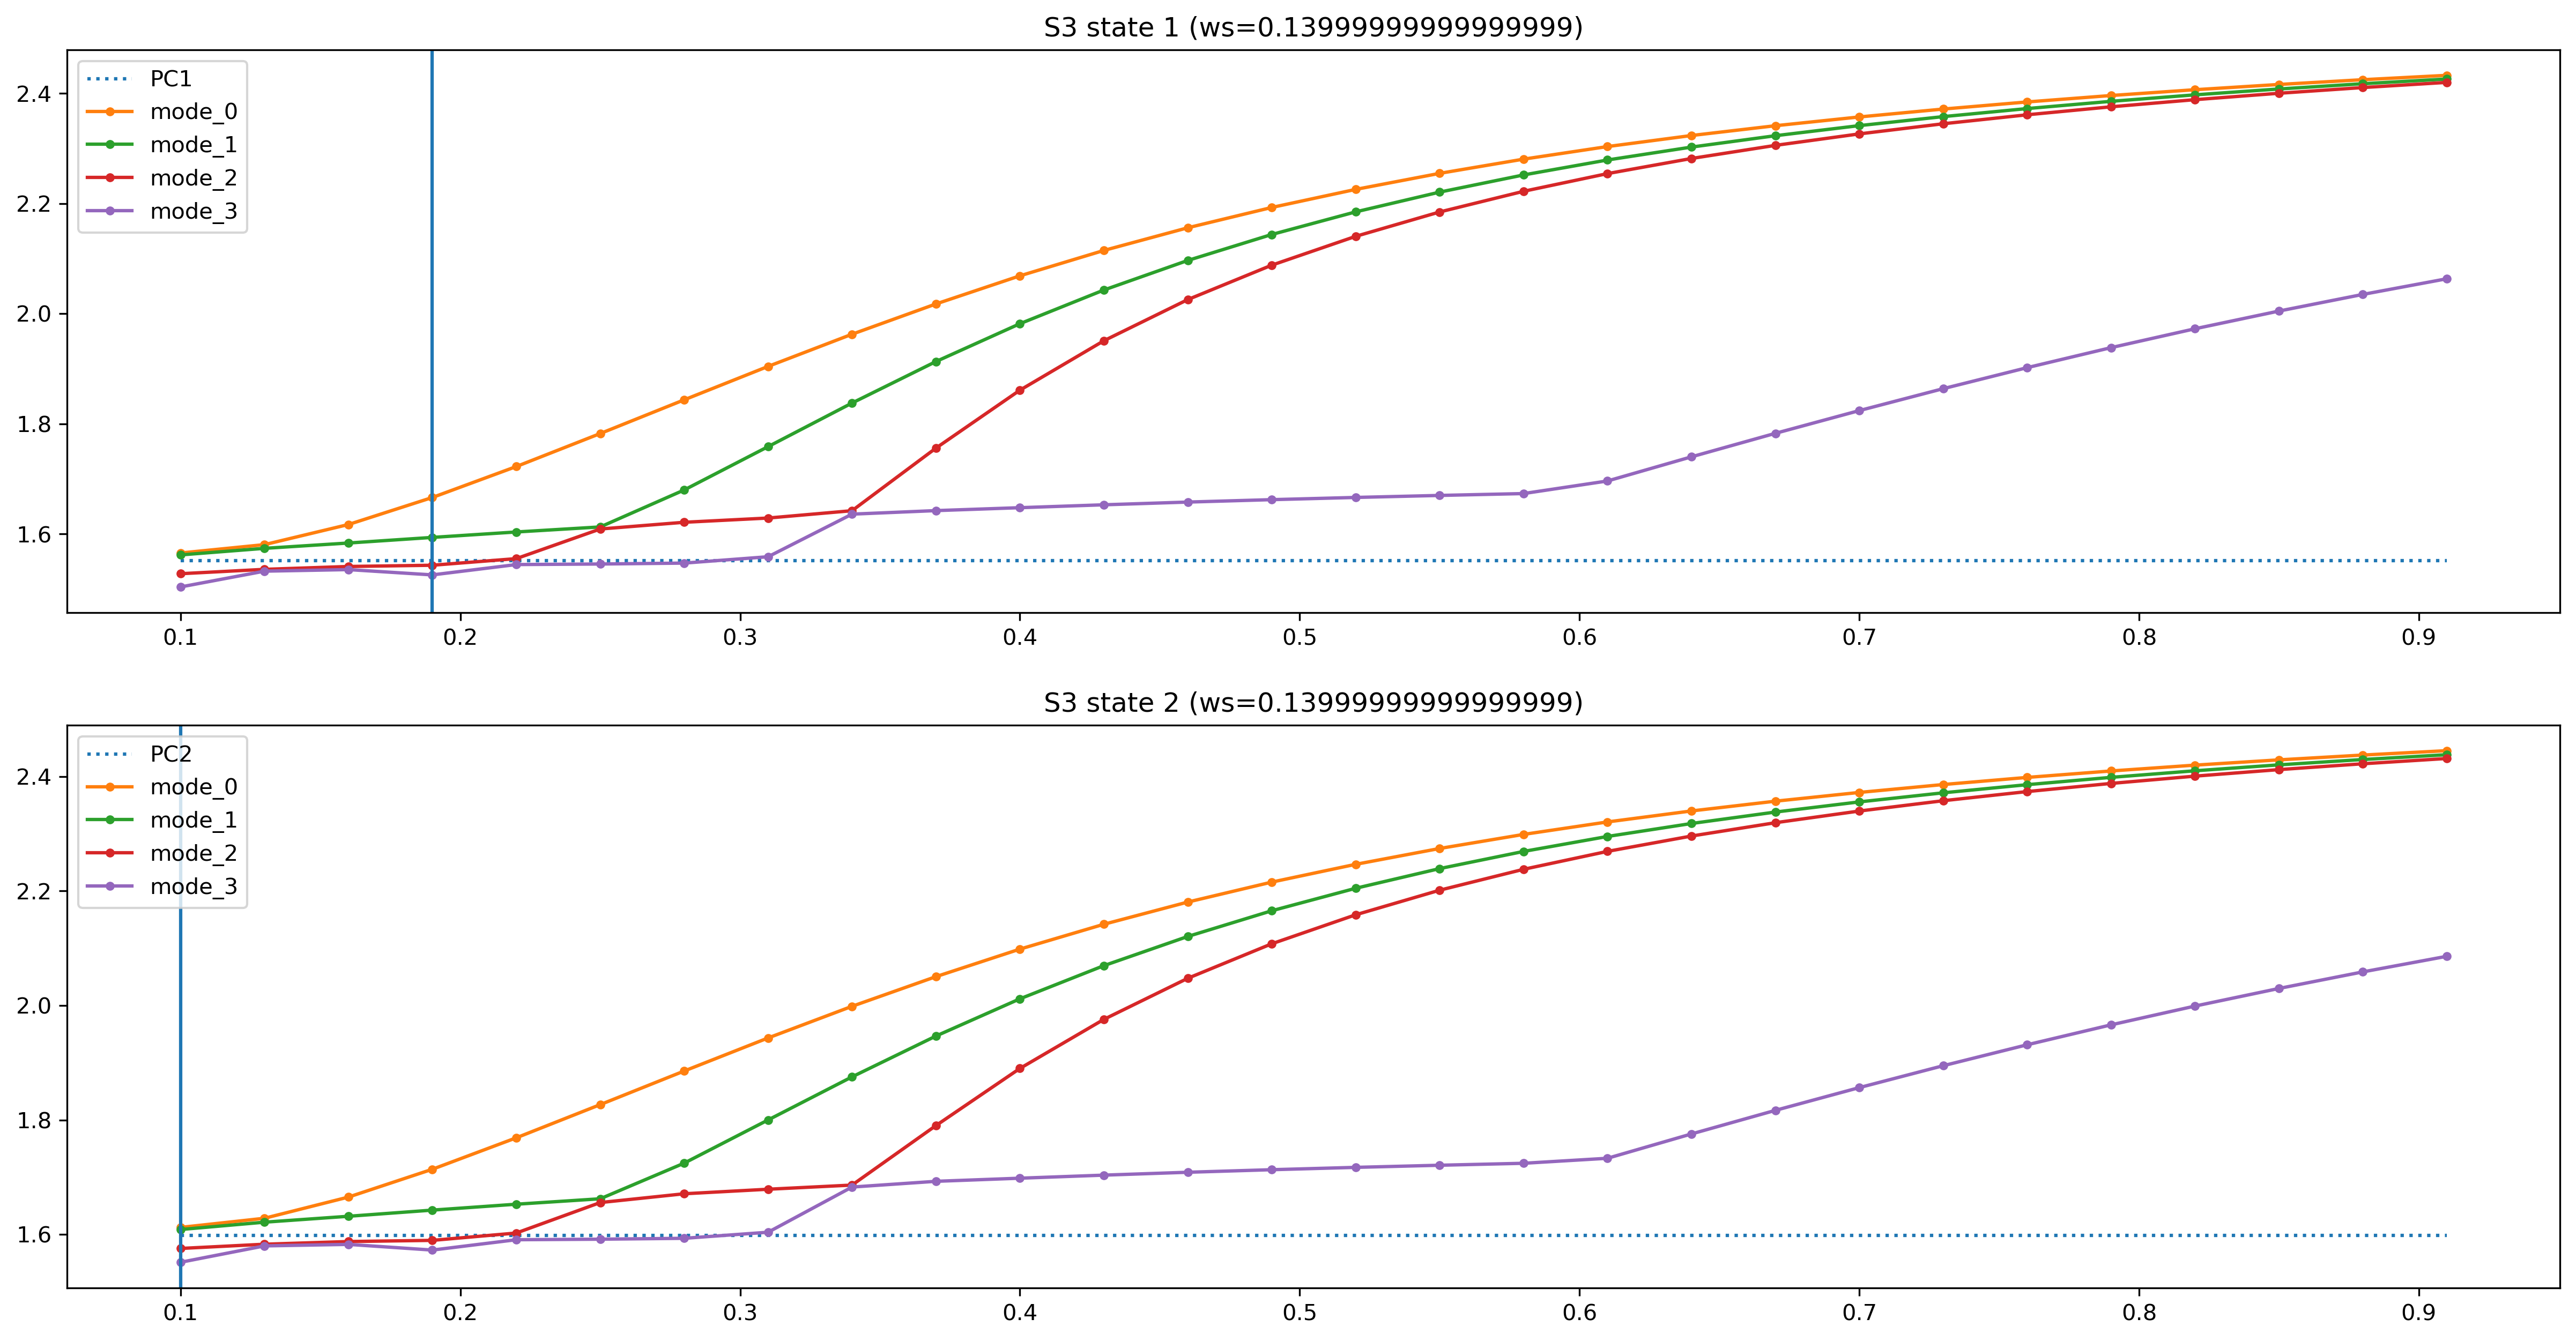

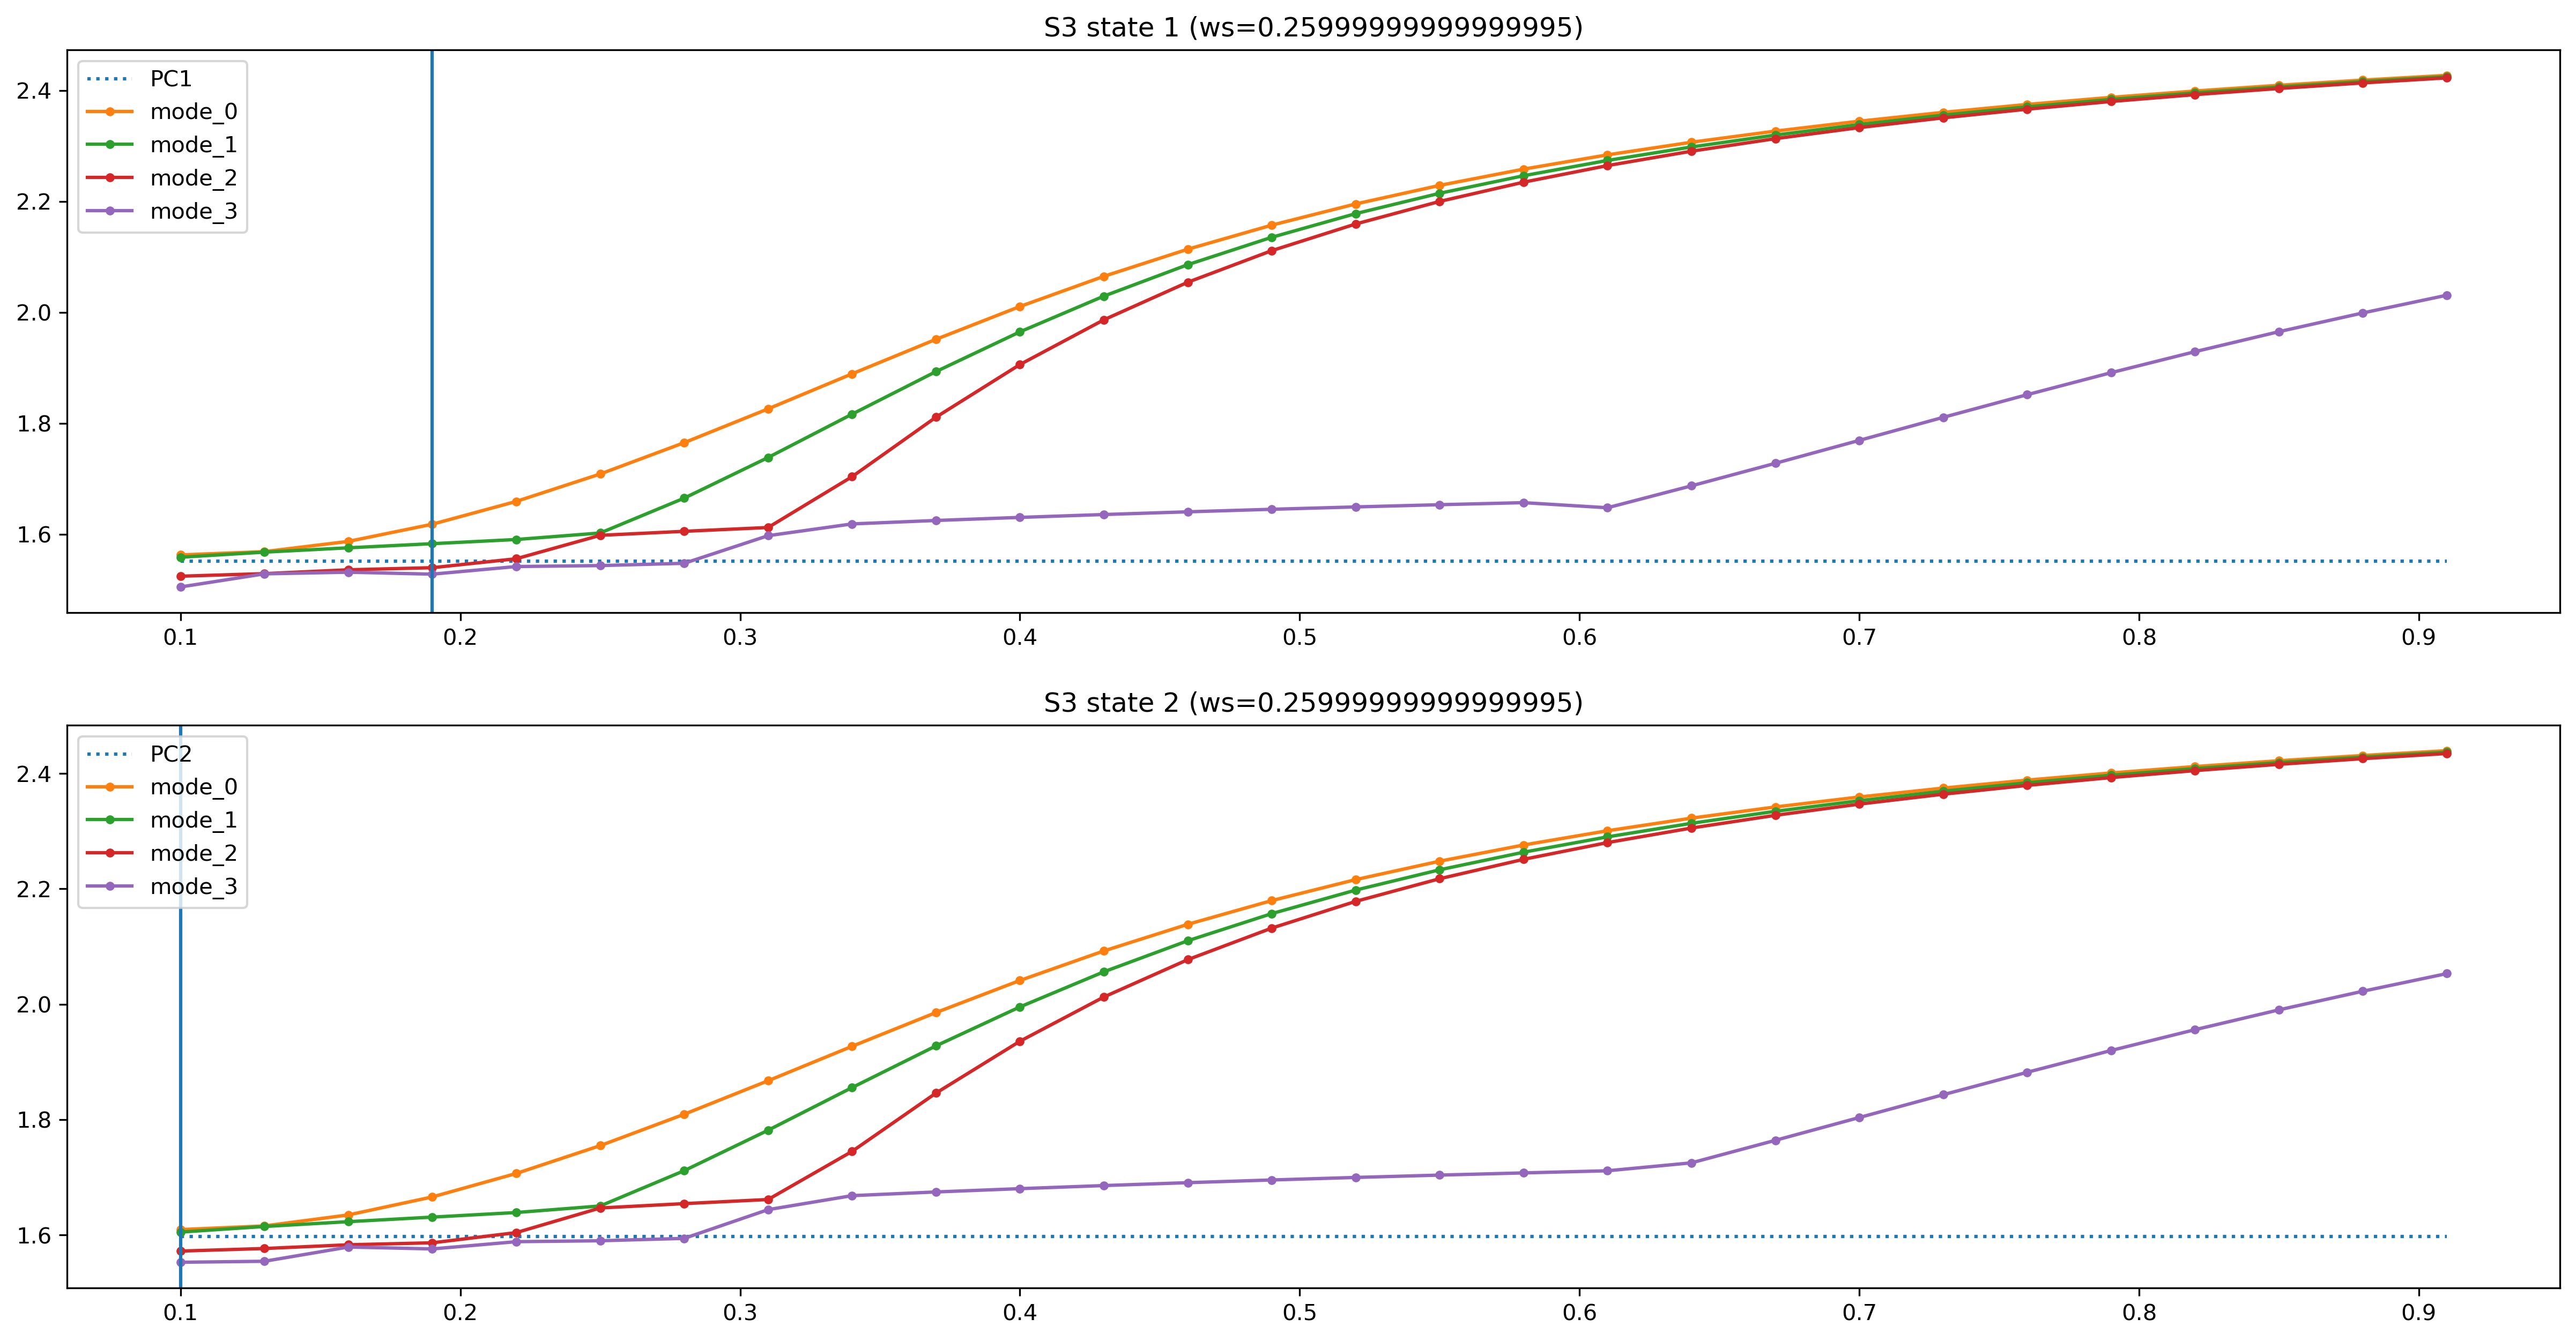

In [92]:
s = 6
setting = np.load(get_path(settings[s][0]))
plot_data_line(settings[s], setting)
plot_data_line(settings[s], setting, ws = 4)
plot_data_line(settings[s], setting, ws = setting.shape[1] // 2)

### 10. S4

0.15 0.1
0.175 0.1
0.175 0.1


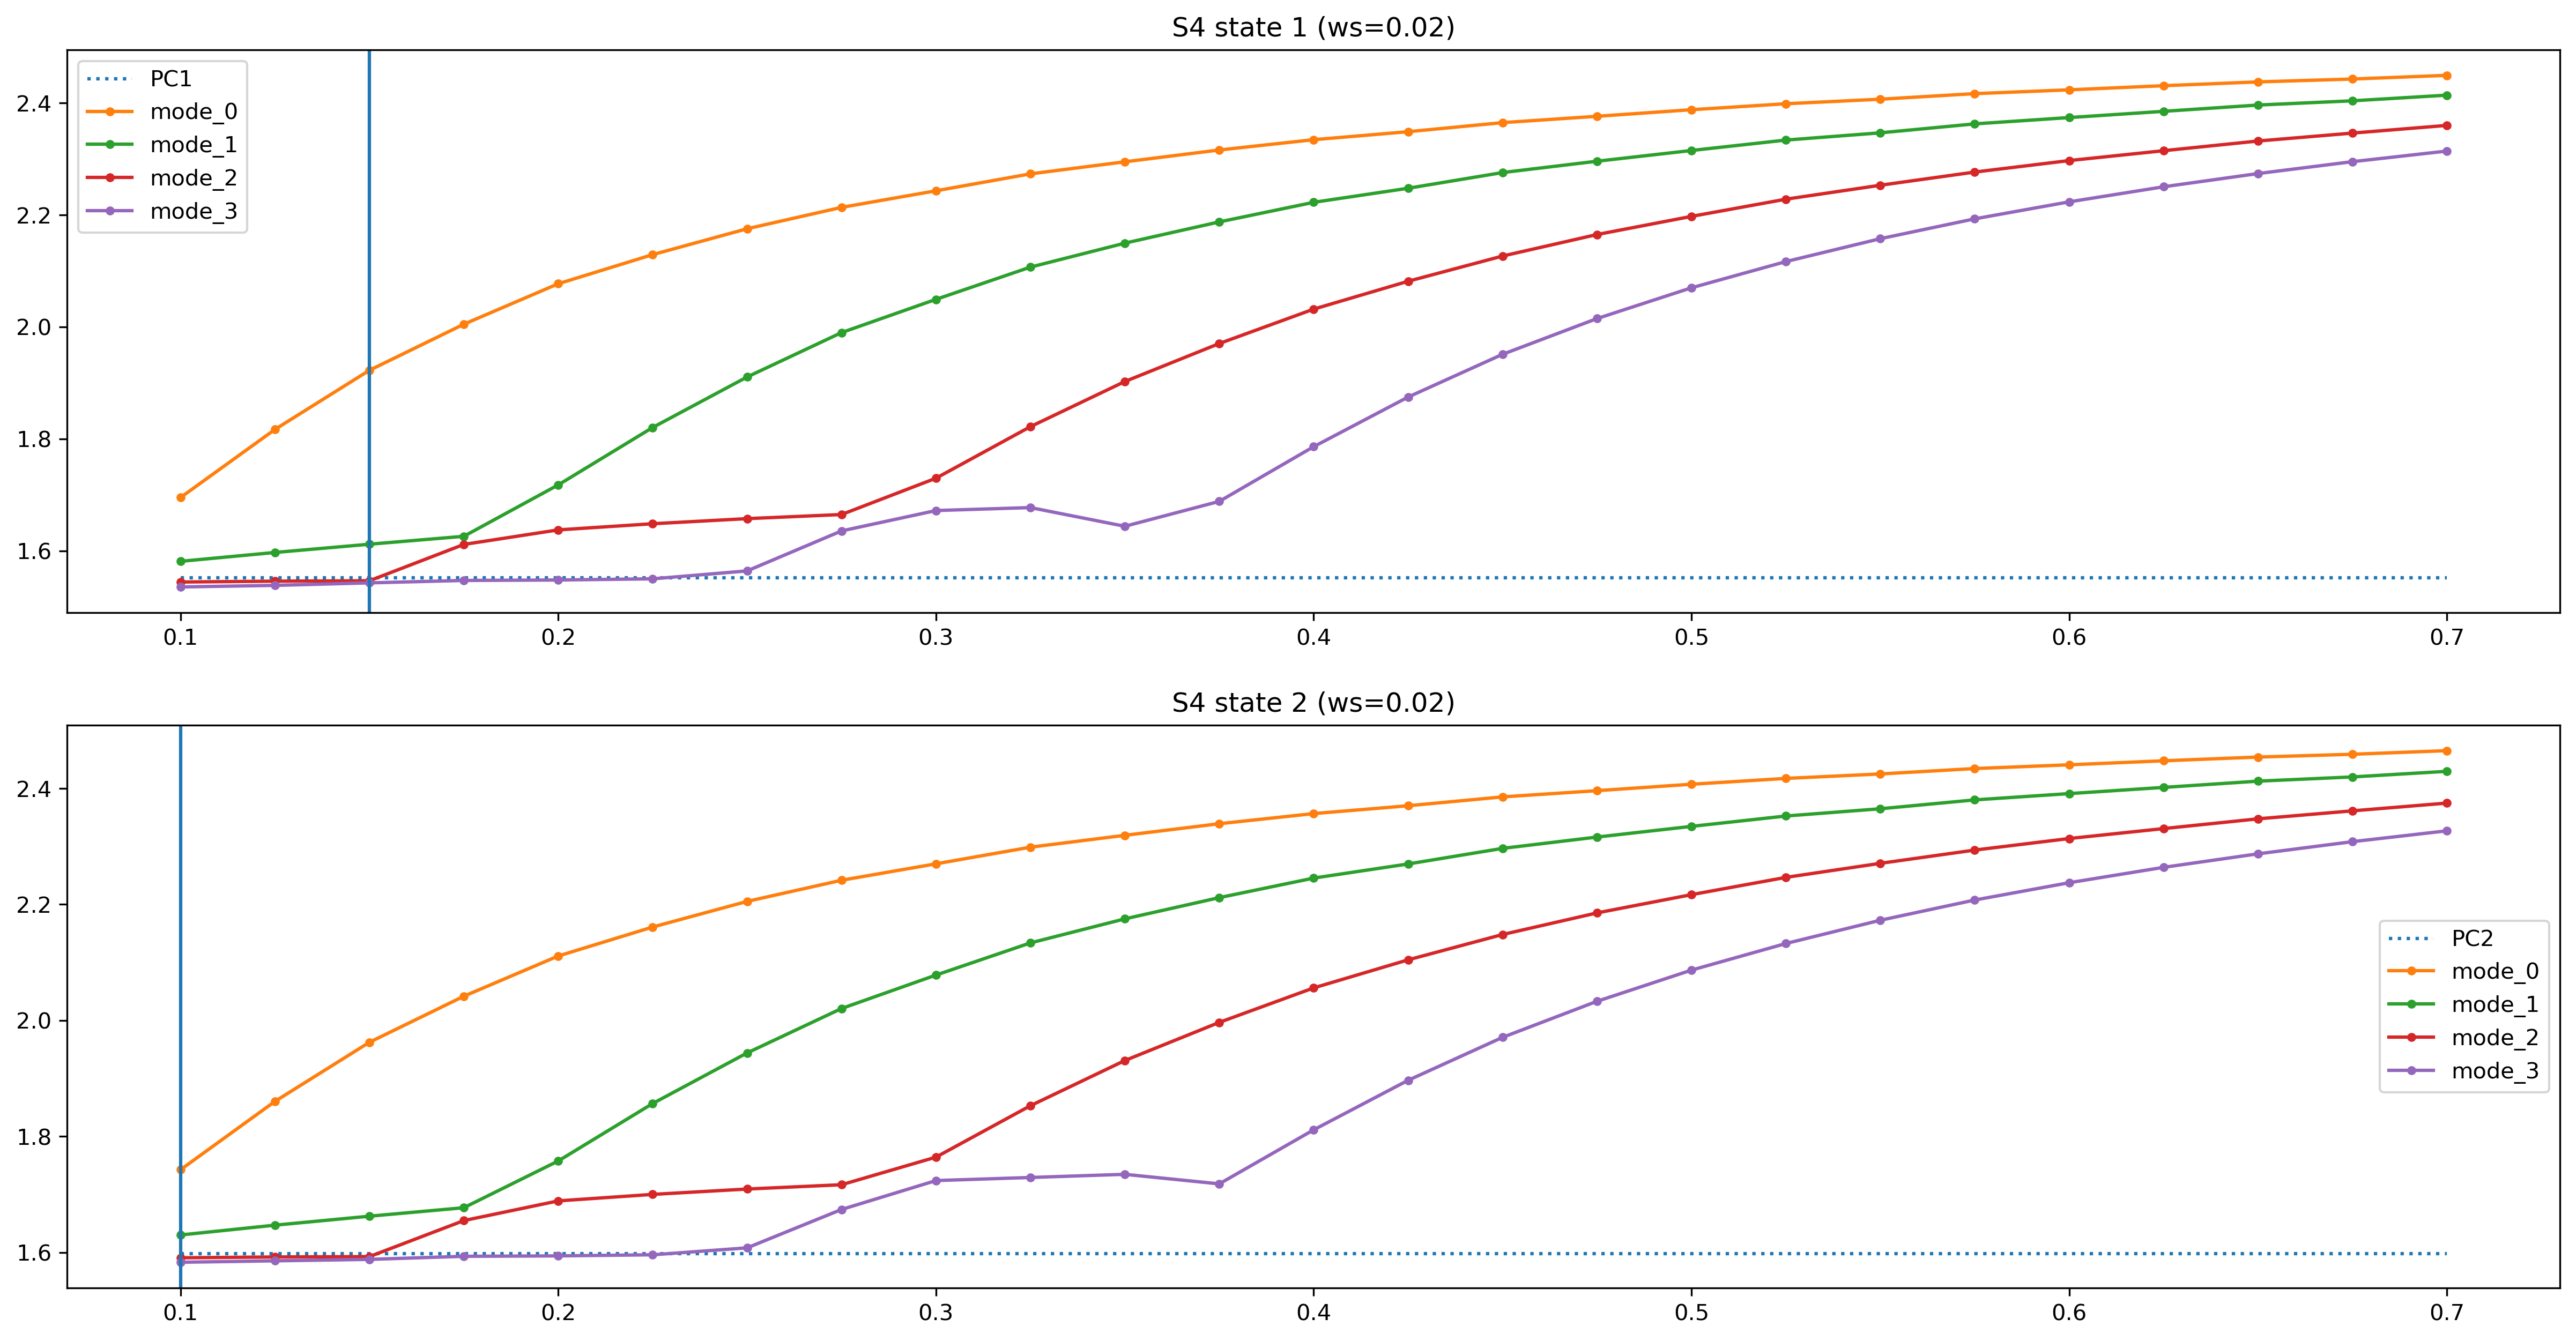

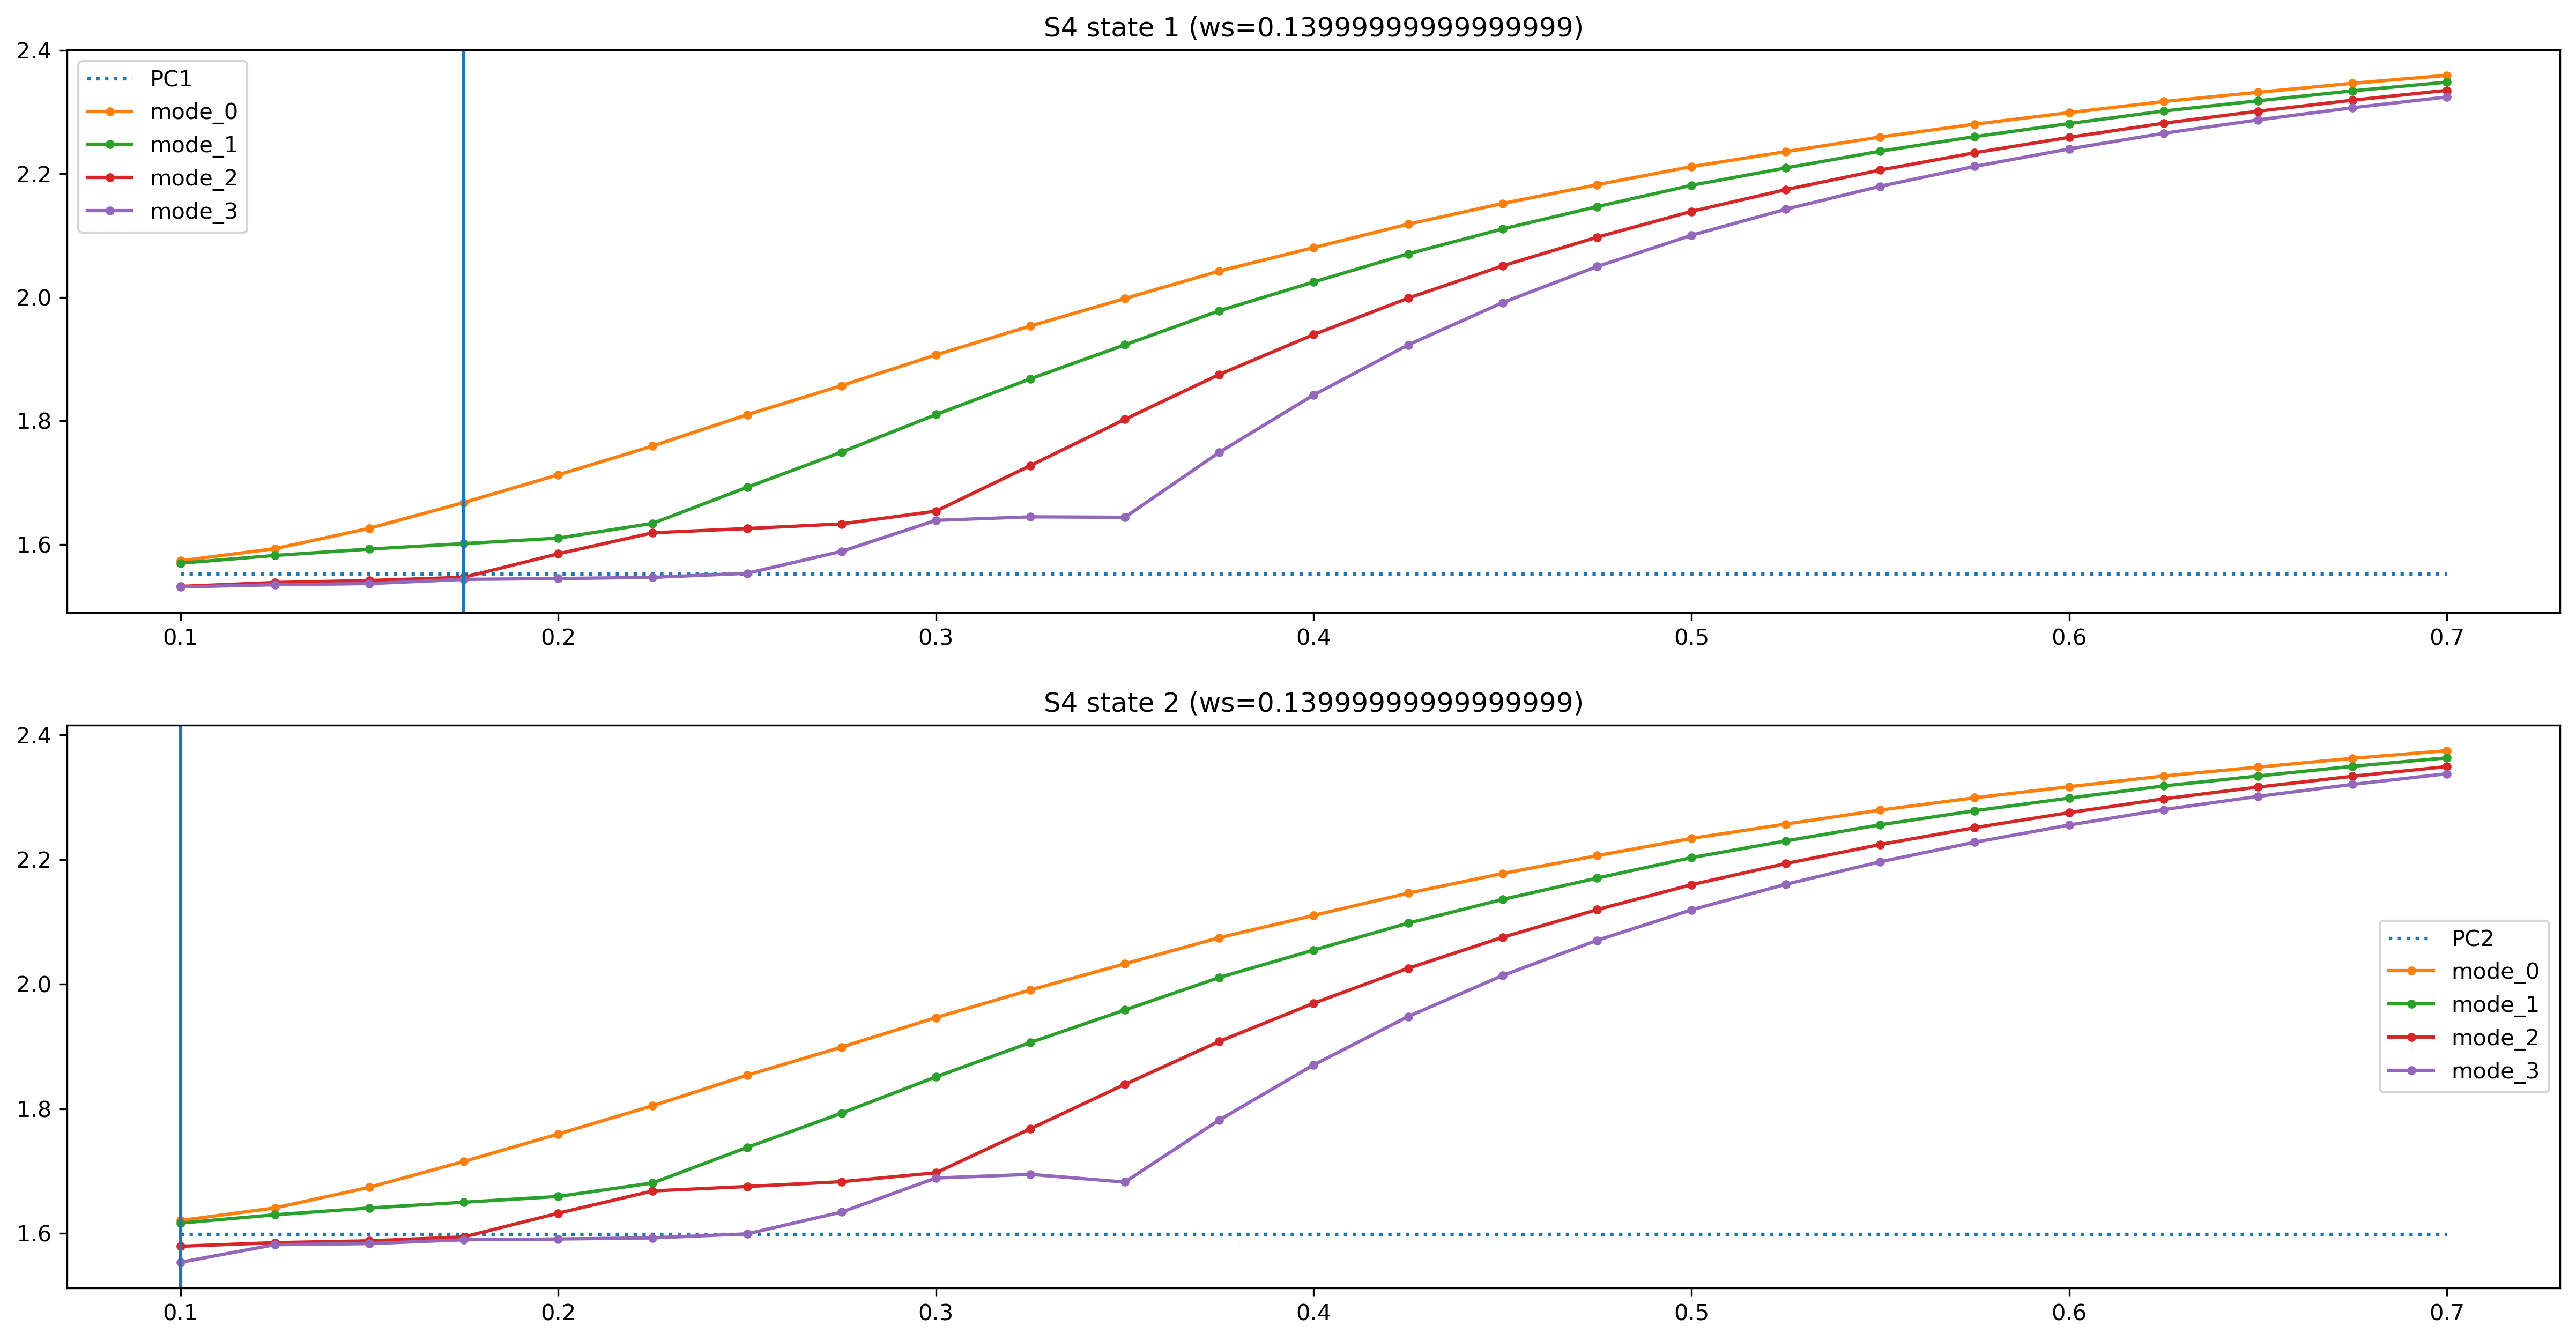

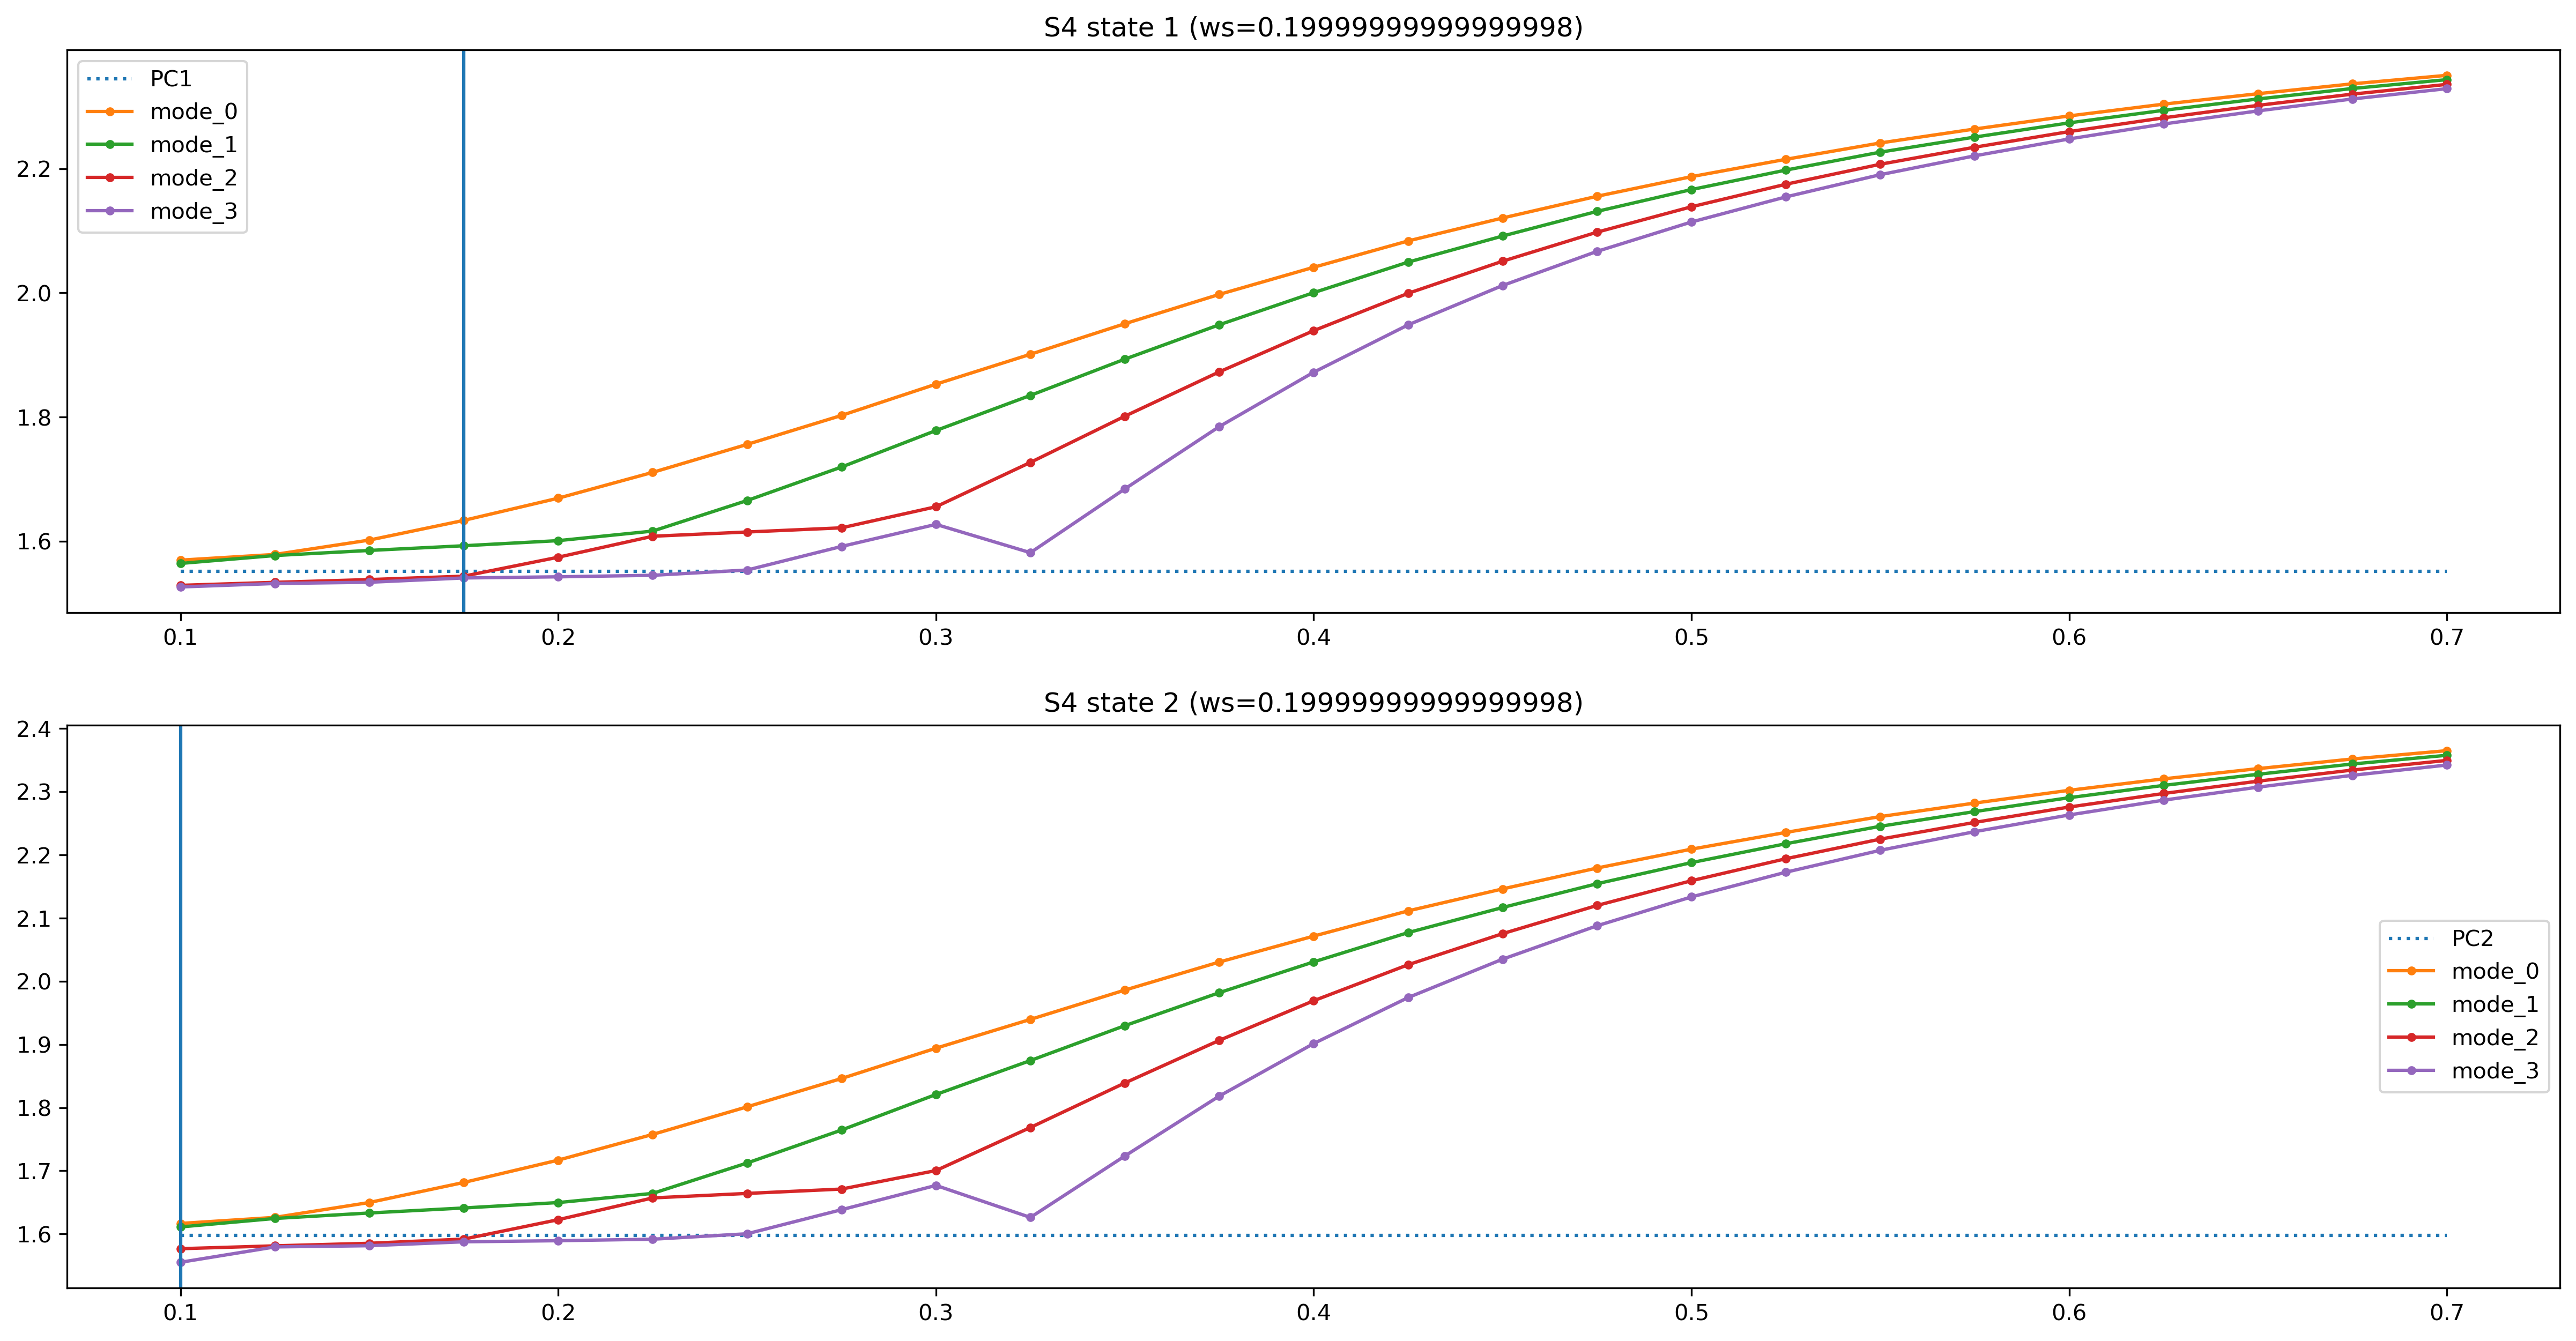

In [93]:
s = 10
setting = np.load(get_path(settings[s][0]))
plot_data_line(settings[s], setting)
plot_data_line(settings[s], setting, ws = 4)
plot_data_line(settings[s], setting, ws = setting.shape[1] // 2)